# Latar Belakang
Perusahaan AWS (Amazon Web Service) yang berfokus pada fitur SaaS adalah perusahaan yang menjual perangkat lunak penjualan dan pemasaran ke perusahaan lain (B2B). AWS SaaS menyediakan berbagai layanan untuk mendukung pengembangan dan implementasi perangkat lunak, termasuk AWS Lambda (komputasi tanpa server), Amazon S3 (penyimpanan objek), Amazon RDS (basis data manajemen hubungan), dan banyak lagi. 

# Pernyataan Masalah
Sebuah Perusahaan AWS ingin mengetahui **tren penjualan perusahaan dari waktu ke waktu**. Analisis tren penjualan dan profitabilitas adalah salah satu analisis data yang paling penting bagi sebuah perusahaan. Analisis ini dapat memberikan wawasan tentang kinerja penjualan dan pemasaran perusahaan, serta mengetahui produk dan layanan apa yang paling menguntungkan atau bahkan mengalami kerugian. Informasi ini dapat membantu untuk memahami bagaimana kinerja perusahaan telah berkembang selama periode waktu tertentu, dan membantu menentukan langkah selanjutnya dalam melakukan strategi pemasaran dan penjualan.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**1. Berapa persentase profit yang berasal dari produk atau layanan tertentu?**

**2. Produk apa yang menghasilkan profit paling rendah atau bahkan mengalami kerugian?**

**3. Produk apa yang menghasilkan profit paling tinggi?**

**4. Bagaimana tren penjualan dan profitabilitas perusahaan pada periode waktu tertentu?**

**5. Bagaimana pengaruh diskon terhadap profit yang dihasilkan?**


# Goals

**1. Mengetahui persentase profit yang berasal dari produk atau layanan tertentu.**

**2. Mengetahui produk yang menghasilkan profit paling rendah.**

**3. Mengetahui produk yang menghasilkan profit paling tinggi.**

**4. Mengetahui tren penjualan dan profitabilitas perusahaan pada periode waktu tertentu.**

**5. Mengetahui seberapa besar pengaruh diskon terhadap profit.**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data penjualan perusahaan SaaS B2B tersebut. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales). Pada dataset ini, setiap baris mewakili satu transaksi/pesanan (9.994 transaksi), dan kolomnya meliputi:

1. Row ID: Nomor unik untuk tiap baris transaksi.
2. Order ID: ID unik untuk tiap pesanan.
3. Order Date: Tanggal saat pesanan dilakukan.
4. Date Key: Representasi numerik dari tanggal pemesanan (YYYYMMDD).
5. Contact Name: Nama orang yang memesan.
6. Country: Negara tempat pesanan dilakukan.
7. City: Kota tempat pesanan dilakukan.
8. Region: Wilayah tempat pesanan dilakukan.
9. Subregion: Subwilayah tempat pesanan dilakukan.
10. Customer: Nama perusahaan yang melakukan pemesanan.
11. Customer ID: ID unik pelanggan
12. Industry: Industri yang digunakan oleh pelanggan.
13. Segment: Segmen pelanggan.
14. Product: Produk yang dipesan
15. License: Kunci lisensi untuk produk.
16. Sales: Jumlah total penjualan untuk transaksi.
17. Quantity: Jumlah total item dalam transaksi.
18. Discount: Diskon yang diterapkan pada transaksi.
19. Profit: Keuntungan dari transaksi.

# Import Library dan Dataset
Mari kita import library yang diperlukan serta dataset yang akan dianalisis.

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro, mannwhitneyu

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('SaaS-Sales.csv')

df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## Data Understanding
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat jumlah data dan tipe data pada setiap kolom.

In [242]:
a,b = df.shape
print(f'Dataset ini terdiri dari {a} baris dan {b} kolom')

df.info()

Dataset ini terdiri dari 9994 baris dan 19 kolom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non

### Melihat Statistik Deskriptif Dataset

In [243]:
display(df.describe(), df.describe(include='object'))           

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


### Melihat Jumlah Data Kosong
Mari kita lihat apakah pada dataset ini terdapat data kosong atau *missing value*.

In [244]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Berdasarkan hasil di atas, dataset ini tidak memiliki *missing value* sehingga tidak diperlukan penanganan lebih lanjut pada *missing value*

## Data Formatting and Cleaning
Selanjutnya, mari kita sesuaikan tipe data yang akan kita analisis dan menghapus kolom yang tidak perlu atau tidak bersangkutan dengan analisis.


In [245]:
# Membuat Row ID menjadi Index, karena kolom Row ID hanya berisi urutan angka dari data pertama hingga data terakhir (sama dengan index)
df.set_index('Row ID', inplace=True)

# Mengubah semua format tanggal dari objek menjadi Datetime64[ns] agar lebih ideal untuk menangani data tanggal dan waktu
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Menghapus kolom 'Date Key' yang hanya representatif numerik dari kolom 'Order Date' sehingga tidak relevan dengan analisis yang akan dilakukan
df = df.drop('Date Key', axis=1)

a,b = df.shape
print(f'Setelah dilakukan data formatting dan cleaning, dataset ini terdiri dari {a} baris dan {b} kolom')
df.info()

Setelah dilakukan data formatting dan cleaning, dataset ini terdiri dari 9994 baris dan 17 kolom
<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   int64         
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 

### Menambahkan Kolom Persentase Profit
Dengan menambahkan kolom baru bernama `Persentase Profit`, kita dapat mengetahui berapa persen besaran profit dari setiap penjualan.

In [246]:
df["Persentase Profit"] = round((df["Profit"] / df["Sales"]) * 100, 2)
display (df.head(), df.tail())

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Persentase Profit
Row ID,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00
2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00
3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00
5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Persentase Profit
Row ID,,,,,,,,,,,,,,,,,,
9990,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028,16.25
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332,17.00
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932,7.50
9993,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200,45.00
9994,AMER-2023-119914,2023-05-05,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480,30.00


### Melihat dan Menghitung Data Unik Pada Setiap Kolom

In [247]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 2022-11-29 00:00:00, 2020-08-26 00:00:00, 2022-07-17 00:00:00, 2021-10-12 00:00:00, 2021-10-31 00:00:00, 2020-03-21 00:00:00, 2023-07-07 00:00:00, 2023-06-25 00:00:00, 2020-08-03 00:00:00, 2023-12-18 00:00:00, 2023-06-04 00:00:00, 2023-12-02 00:00:00, 2021-02-09 00:00:00, 2021-01-02 00:00:00, 2022-10-29 00:00:00, ...]"
2,Contact Name,793,"[Nathan Bell, Deirdre Bail

Secara umum, kita bisa melihat bahwa:
* Dataset SaaS Sales memiliki 18 kolom (setelah ditambah kolom `Persentase Profit`) dan 9.994 baris.
* Tidak ada kolom yang memiliki data kosong atau *missing value*.
* Kolom `Order Date` memiliki 1237 data tanggal pesanan unik, yang menunjukkan bahwa dataset ini mencakup rentang 2020-01-04 hingga 2023-12-31.
* Kolom `License` memiliki 9.994 data unik, artinya tidak ada duplikasi *license code* pada kolom ini.
* Kolom `Product` memiliki 14 variasi product yang dijual, kita dapat lihat nanti produk mana yang memiliki profit paling rendah sehingga perlu tindakan untuk mengatasinya.
* Pada kolom `Profit` terdapat nilai negatif yang artinya ada penjualan yang menghasilkan kerugian.
* Kolom `Discount` memiliki nilai yang cukup tinggi (mendekati 1 atau 100%), artinya ada penjualan yang potongan harganya cukup besar sehingga nilai profit berkurang atau bahkan mengalami kerugian

### Memastikan Kembali Keberadaan Data Kosong atau Missing Value Menggunakan Heatmap
Dengan menggunakan heatmap kita dapat dengan mudah mengidentifikasi *missing value* pada sebuah dataset. Dengan hasil seperti di bawah ini, dapat dipastikan bahwa dataset SaaS Sales tidak memiliki *missing value* pada setiap kolom dan baris karena hanya terlihat warna hitam pada heatmap.

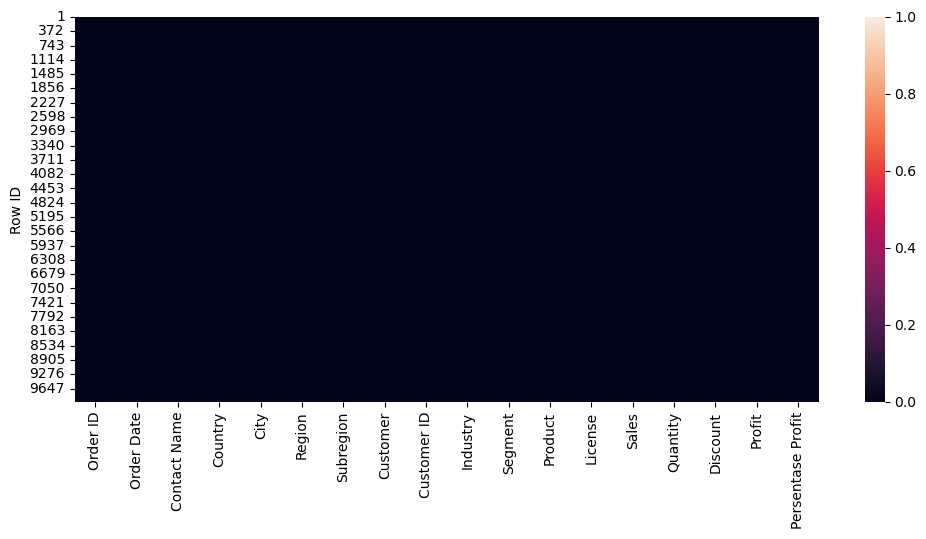

In [248]:
plt.figure(figsize = (12, 5))
sns.heatmap(data = df.isna(), vmin = 0, vmax = 1)
plt.show()

### Melakukan Pengecekan Data Duplikat
Mari kita cek apakah dataset memiliki duplikasi data

In [249]:
df.duplicated().sum()


0

Dengan hasil seperti di atas, dapat kita lihat bahwa tidak terdapat data duplikasi pada dataset ini. Untuk memastikannya kembali mari kita gunakan kolom `license` untuk pengecekan data duplikat, karena *license code* dari setiap produk bersifat unik.

In [250]:
df[df['License'].duplicated(keep=False)].head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Persentase Profit
Row ID,,,,,,,,,,,,,,,,,,


### Melakukan Pengecekan Outliers dan Anomali Data
Mari kita lakukan pengecekan pada dataset apakah terdapat outliers dan anomali data dengan menggunakan box plot.

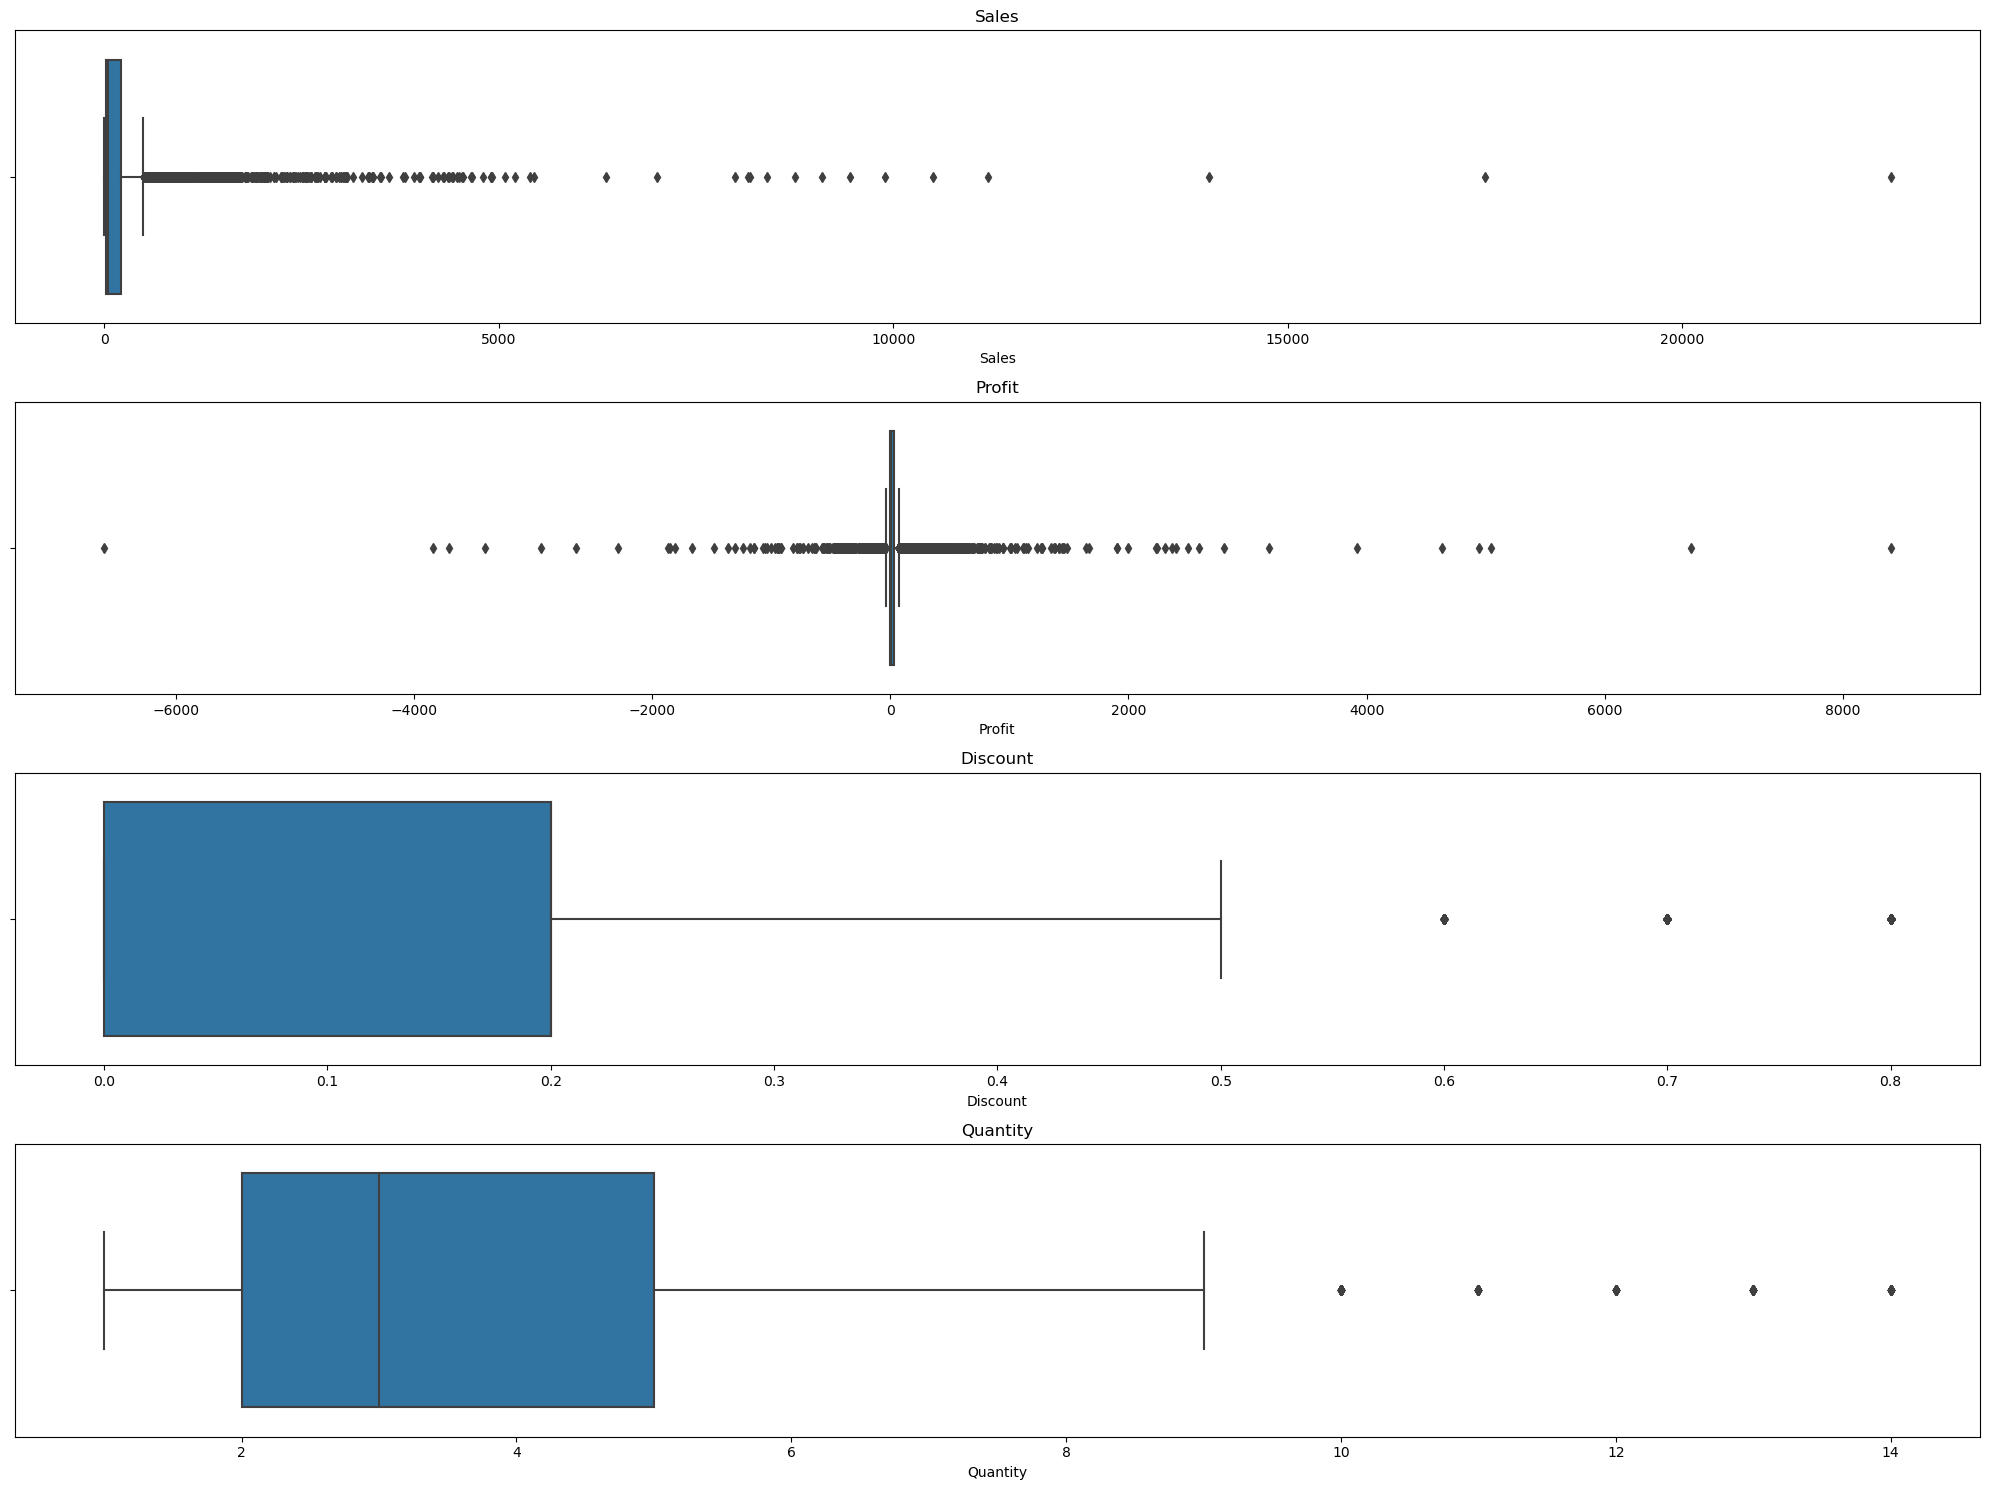

In [251]:
feature = ['Sales', 'Profit', 'Discount', 'Quantity']
plt.figure(figsize=(20, 15))

for idx, col in enumerate(feature, start=1):
    plt.subplot(4, 1, idx)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [252]:
df[['Sales','Discount','Profit','Quantity']].describe()

,Sales,Discount,Profit,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574
std,623.245101,0.206452,234.260108,2.225110
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.728750,2.000000
50%,54.490000,0.200000,8.666500,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


Sekilas dengan hasil boxplot dan statistik deskriptif diatas bisa kita lihat bahwa terdapat outliers pada kolom yang kita cari, akan tetapi tidak ada nilai negatif pada kolom `Sales`, `Discount`, dan `Quantity`. Ini menunjukkan bahwa data pada tiga kolom tersebut tidak terdapat anomali karena tiga kolom tersebut akan cukup aneh jika memiliki nilai yang negatif. Pada kolom `Profit` terdapat nilai negatif, tetapi ini bisa kita katakan bukan sebuah anomali karena nilai profit yang negatif adalah hal yang lumrah dalam bisnis. Namun kita tetap harus mencari tahu produk mana yang memiliki profit negatif agar dapat dibenahi sehingga tren profit pada produk tersebut dapat ditingkatkan.

### Melakukan Pengecekan Outliers dengan Lebih Mendalam
Mari kita cek outliers yang terdapat pada kolom yang kita cari dengan lebih detail.

In [253]:
from tabulate import tabulate

Library tabulate merupakan library pada python yang dapat membantu kita dalam memformat dan menampilkan data tabular atau data terstruktur dengan cara yang mudah dibaca.

In [254]:
col = ['Sales', 'Quantity', 'Discount', 'Profit']
df_num = df.select_dtypes(include='number')

table_results = []

for i in col:
    rnge = np.max(df_num[i]) - np.min(df_num[i])
    std = np.std(df_num[i])
    Q1 = np.quantile(df_num[i], 0.25)
    Q3 = np.quantile(df_num[i], 0.75)
    IQR = Q3 - Q1
    upperbound = Q3 + 1.5 * IQR
    lowerbound = Q1 - 1.5 * IQR
    outlier = df_num[i][(df_num[i] > upperbound) | (df_num[i] < lowerbound)]

    table_results.append([
        i,
        rnge,
        std,
        IQR,
        lowerbound,
        upperbound,
        len(outlier)
    ])

headers = ['Column', 'Range', 'Std Dev', 'IQR', 'Lower Bound', 'Upper Bound', 'Outliers']
print(tabulate(table_results, headers=headers, tablefmt='pretty'))

+----------+--------------------+--------------------+----------+----------------------+-------------+----------+
|  Column  |       Range        |      Std Dev       |   IQR    |     Lower Bound      | Upper Bound | Outliers |
+----------+--------------------+--------------------+----------+----------------------+-------------+----------+
|  Sales   |     22638.036      | 623.2139187650471  |  192.66  | -271.71000000000004  |   498.93    |   1167   |
| Quantity |         13         | 2.224998366078636  |   3.0    |         -2.5         |     9.5     |   170    |
| Discount |        0.8         | 0.2064416387716419 |   0.2    | -0.30000000000000004 |     0.5     |   856    |
|  Profit  | 14999.954000000002 | 234.24838736035906 | 27.63525 |      -39.724125      |  70.816875  |   1881   |
+----------+--------------------+--------------------+----------+----------------------+-------------+----------+


Dari hasil pengecekan outlier diatas dapat kita artikan sebagai berikut:

* Terdapat outlier yang cukup banyak pada kolom `Sales`, ini menunjukkan bahwa banyak terjadi penjualan yang sangat tinggi atau rendah dan berada jauh dari nilai penjualan biasanya pada waktu tertentu.
* Kolom `Quantity` memiliki jumlah outlier yang jauh lebih kecil, ini menunjukkan jarang terjadinya jumlah pembelian barang yang sangat tinggi atau rendah dibandingkan dengan jumlah pesanan biasanya.
* Pada kolom `Discount` terdapat 856 transaksi yang diberikan diskon lebih dari biasanya.
* 1.881 jumlah outlier pada kolom `Profit` menunjukkan bahwa banyak terjadi profit yang diambil dari penjualan memiliki nilai yang berbeda dari biasanya, mungkin bisa sangat tinggi atau sebaliknya.

Dari hasil pencarian outlier ini saya tidak akan melakukan tindakan apapun, karena saya ingin menganalisis tentang produk yang memiliki profit paling rendah dalam dataset ini dan mencari tahu apakah profit negatif ini terjadi pada produk dengan tingkat penjualan yang tinggi atau tidak. Jika saya menghapus atau menghilangkan outlier yang terletak di penjualan dengan nilai 10.000 atau lebih tinggi, saya tidak dapat menganalisis tentang kondisi ini dan menjawab pertanyaan pada pernyataan masalah di awal.

### Melakukan Pengecekan Anomali
Mari kita cek apakah terdapat data anomali pada sisa kolom yang akan kita analisis di dataset ini.

Kolom `Order ID` dan `Order Date`

In [255]:
df['Order ID'].nunique()

5009

Dataset ini terdiri dari 5009 transaksi

In [256]:
df.groupby('Order ID')['License'].unique().reset_index().head()

,Order ID,License
0,AMER-2020-100090,"[4BEAB9UXKH, AVBMH39MTD]"
1,AMER-2020-100279,[NI5MITNJ98]
2,AMER-2020-100363,"[0O2MCUTMFW, 7ZEJI08M1P]"
3,AMER-2020-100762,"[9WNGMUMGIU, QLK9TG5206, V5SQA48WYZ, 5F2LX40BDP]"
4,AMER-2020-100860,[T3NURF3EZL]


In [257]:
df['License'].duplicated().sum()

0

Dapat dipastikan tidak ada license code yang duplikat

In [258]:
df.groupby('Order ID')['Order Date'].unique().reset_index().sample(10)

,Order ID,Order Date
734,AMER-2022-102596,[2022-12-28 00:00:00]
1373,AMER-2023-117926,[2023-12-09 00:00:00]
2526,APJ-2022-165078,[2022-11-06 00:00:00]
3037,EMEA-2020-122217,[2020-11-24 00:00:00]
1530,AMER-2023-134439,[2023-09-19 00:00:00]
1335,AMER-2023-113201,[2023-07-01 00:00:00]
4251,EMEA-2022-161683,[2022-12-04 00:00:00]
3947,EMEA-2022-122392,[2022-07-23 00:00:00]
3072,EMEA-2020-127488,[2020-09-22 00:00:00]
2575,APJ-2023-105389,[2023-10-24 00:00:00]


Order ID memiliki sebuah pola yaitu Region - Tahun - 6 digit angka.

In [259]:
max_Date = df['Order Date'].max()

date_info = pd.DataFrame({'Tanggal Akhir': [max_Date]})
display(date_info)

,Tanggal Akhir
0,2023-12-31


In [260]:
min_Date = df['Order Date'].min()

date_info = pd.DataFrame({'Tanggal Awal': [min_Date]})
display(date_info)

,Tanggal Awal
0,2020-01-04


Transaksi pertama terjadi pada Januari 2020 dan transaksi terakhir terjadi pada Desember 2023

Melakukan pengecekan spasi berlebih pada dataset, karena dengan data yang didominasi oleh tipe object sangat rentan dengan berlebihnya spasi.

In [261]:
import re

def check_excessive_whitespace(value):
    if isinstance(value, str):
        return bool(re.search(r'\s{2,}', value))
    return False

whitespace_info = []
for column in df.columns:
    has_excessive_whitespace = df[column].apply(check_excessive_whitespace).any()
    whitespace_info.append({'Column': column, 'Has Excessive Whitespace': has_excessive_whitespace})

whitespace_df = pd.DataFrame(whitespace_info)
whitespace_df

,Column,Has Excessive Whitespace
0,Order ID,False
1,Order Date,False
2,Contact Name,False
3,Country,False
4,City,False
5,Region,False
6,Subregion,False
7,Customer,False
8,Customer ID,False
9,Industry,False


Dari hasil pengecekan di atas, dapat kita pastikan bahwa pada kolom `Order ID` dan `Order Date` tidak terdapat anomali.

Kolom `Country`, `Region`, `Subregion`, dan `City`

In [262]:
df.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
1,APJ,"[Japan, Australia, Philippines, India, Singapore, New Zealand, South Korea, China, Indonesia, Taiwan]"
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, France, Luxembourg, United Kingdom, Spain, South Africa, Portugal, Belgium, Russia, Netherlands, Poland, Czech Republic, Saudi Arabia, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, Austria, Egypt, Denmark, Croatia, Qatar, Slovenia, Iceland]"


Setiap country sudah sesuai dengan regionnya

In [263]:
df.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[Australia, New Zealand]"
1,APAC,"[Philippines, Singapore, South Korea, China, Indonesia, Taiwan]"
2,EU,[Italy]
3,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
4,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]"
5,IND,[India]
6,JAPN,[Japan]
7,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
8,MEA,"[Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]"
9,NAMER,"[United States, Canada]"


Setiap country juga sudah sesuai dengan subregionnya

In [264]:
df.groupby('Subregion')['City'].count().reset_index()

,Subregion,City
0,ANZ,529
1,APAC,447
2,EU,110
3,EU-EAST,343
4,EU-WEST,1614
5,IND,149
6,JAPN,985
7,LATAM,1158
8,MEA,396
9,NAMER,2507


In [265]:
df.groupby('Country')['City'].unique().reset_index()

,Country,City
0,Argentina,"[Córdoba, Buenos Aires, Mendoza, Rosario]"
1,Australia,"[Wollongong, Sydney, Canberra, Geelong, Melbourne, Adelaide, Brisbane, Hobart, Gold Coast, Perth]"
2,Austria,[Vienna]
3,Belgium,"[Brussels, Antwerp, Ghent]"
4,Brazil,"[Salvador, Rio de Janeiro, São Paulo, Manaus, Belo Horizonte, Brasília]"
5,Canada,"[Toronto, Vancouver, Hamilton, Ottawa, Montreal, Calgary, Quebec, Regina, Winnipeg, Victoria]"
6,Chile,"[Puente Alto, Santiago, Antofagasta]"
7,China,"[Shanghai, Shenzhen, Guangzhou, Beijing, Tianjin, Suzhou, Chengdu]"
8,Colombia,"[Bogotá, Medellín, Cali]"
9,Costa Rica,[San José]


In [266]:
np.sort(df['City'].unique())

array(['Abu Dhabi', 'Adelaide', 'Aichi', 'Alexandria', 'Alicante',
       'Amsterdam', 'Anaheim', 'Ankara', 'Antofagasta', 'Antwerp',
       'Arlington', 'Athens', 'Atlanta', 'Auckland', 'Aurora', 'Austin',
       'Baltimore', 'Bandung', 'Bangalore', 'Barcelona', 'Bari',
       'Beijing', 'Belfast', 'Belo Horizonte', 'Berlin', 'Birmingham',
       'Bogotá', 'Bologna', 'Brasília', 'Brescia', 'Brighton', 'Brisbane',
       'Bristol', 'Brno', 'Brussels', 'Buenos Aires', 'Buffalo',
       'Burlington', 'Bursa', 'Busan', 'Cabo San Lucas', 'Cairo',
       'Calgary', 'Cali', 'Canberra', 'Cancun', 'Cape Town', 'Cardiff',
       'Catania', 'Charlotte', 'Chengdu', 'Chennai', 'Chiba', 'Chicago',
       'Cleveland', 'Clinton', 'Cologne', 'Columbia', 'Columbus',
       'Copenhagen', 'Cork', 'Córdoba', 'Daegu', 'Dallas', 'Davao City',
       'Delhi', 'Denver', 'Detroit', 'Dhahran', 'Doha', 'Donetsk',
       'Dresden', 'Dubai', 'Dublin', 'Edinburgh', 'Espoo', 'Everett',
       'Florence', 'Fort Worth

Menurut hasil pengecekan diatas dapat kita pastikan tidak ada anomali yang kita temukan pada kolom `Country`, `Region`, `Subregion`, dan `City`. Karena mulai dari region dan subregion yang sudah sesuai (tidak ada subregion yang salah region), subregion dan country yang tepat, country dan city yang sesuai, hingga penulisan nama pada kolom city yang akurat.

Kolom `Industry`, `Product`, dan `Segment`.

In [267]:
df.groupby('Industry')['Product'].unique().reset_index()

,Industry,Product
0,Communications,"[ChatBot Plugin, Marketing Suite - Gold, OneView, Data Smasher, ContactMatcher, Support, Big Ol Database, SaaS Connector Pack, SaaS Connector Pack - Gold, FinanceHub, Site Analytics, Storage, Marketing Suite]"
1,Consumer Products,"[ContactMatcher, Site Analytics, SaaS Connector Pack, Data Smasher, Support, OneView, SaaS Connector Pack - Gold, ChatBot Plugin, FinanceHub, Marketing Suite, Big Ol Database, Marketing Suite - Gold, Storage, Alchemy]"
2,Energy,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, Support, Site Analytics, OneView, Storage, SaaS Connector Pack, Big Ol Database, ChatBot Plugin, Data Smasher, Alchemy, SaaS Connector Pack - Gold]"
3,Finance,"[SaaS Connector Pack, ChatBot Plugin, Site Analytics, ContactMatcher, OneView, SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Marketing Suite - Gold, Data Smasher, Support, Storage, Big Ol Database, Alchemy]"
4,Healthcare,"[OneView, ContactMatcher, FinanceHub, SaaS Connector Pack, Marketing Suite - Gold, SaaS Connector Pack - Gold, Site Analytics, Data Smasher, Support, Storage, Alchemy, ChatBot Plugin, Marketing Suite, Big Ol Database]"
5,Manufacturing,"[Marketing Suite - Gold, ContactMatcher, Data Smasher, FinanceHub, SaaS Connector Pack, Support, OneView, Storage, Marketing Suite, ChatBot Plugin, Site Analytics, Big Ol Database, SaaS Connector Pack - Gold, Alchemy]"
6,Misc,"[Support, OneView, Data Smasher, SaaS Connector Pack, ContactMatcher, SaaS Connector Pack - Gold, ChatBot Plugin, Site Analytics, Marketing Suite - Gold, FinanceHub, Storage, Big Ol Database, Alchemy, Marketing Suite]"
7,Retail,"[Marketing Suite - Gold, ChatBot Plugin, OneView, FinanceHub, Storage, Site Analytics, ContactMatcher, Data Smasher, SaaS Connector Pack, Support, Big Ol Database, SaaS Connector Pack - Gold, Marketing Suite, Alchemy]"
8,Tech,"[ContactMatcher, Marketing Suite, SaaS Connector Pack, SaaS Connector Pack - Gold, ChatBot Plugin, Marketing Suite - Gold, Data Smasher, Support, FinanceHub, Site Analytics, Storage, Big Ol Database, OneView, Alchemy]"
9,Transportation,"[ContactMatcher, SaaS Connector Pack, Marketing Suite - Gold, Data Smasher, FinanceHub, ChatBot Plugin, Site Analytics, Support, Big Ol Database, OneView, Storage, Alchemy, Marketing Suite, SaaS Connector Pack - Gold]"


In [268]:
df.groupby('Segment')['Product'].unique().reset_index()

,Segment,Product
0,Enterprise,"[OneView, ContactMatcher, Support, SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Site Analytics, Marketing Suite - Gold, SaaS Connector Pack, Data Smasher, ChatBot Plugin, Storage, Big Ol Database, Alchemy]"
1,SMB,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, SaaS Connector Pack, ChatBot Plugin, Site Analytics, OneView, Support, Data Smasher, SaaS Connector Pack - Gold, Storage, Big Ol Database, Alchemy]"
2,Strategic,"[FinanceHub, ChatBot Plugin, OneView, Site Analytics, SaaS Connector Pack, Marketing Suite - Gold, Data Smasher, ContactMatcher, Storage, SaaS Connector Pack - Gold, Support, Marketing Suite, Big Ol Database, Alchemy]"


In [269]:
df.groupby('Segment')['Industry'].unique().reset_index()

,Segment,Industry
0,Enterprise,"[Healthcare, Misc, Finance, Energy, Retail, Manufacturing, Consumer Products, Transportation, Tech, Communications]"
1,SMB,"[Energy, Finance, Tech, Manufacturing, Retail, Consumer Products, Healthcare, Communications, Transportation, Misc]"
2,Strategic,"[Energy, Retail, Consumer Products, Manufacturing, Tech, Finance, Transportation, Healthcare, Communications, Misc]"


Dari hasil pengecekan diatas, dapat kita lihat adanya kesamaan antara ketiga segmen tersebut sehingga dipastikan tidak ada anomali pada kolom-kolom tersebut.

### Melakukan Pengecekan Normalitas Data
Uji normalitas pada data sangat penting karena menentukan metode statistik apa yang akan kita gunakan. Apabila data terdistribusi secara normal, maka penyebaran data dapat diprediksi di sekitar rata-rata. Tetapi apabila terdistribusi secara tidak normal, maka penyebaran data akan berada di sekitar median.

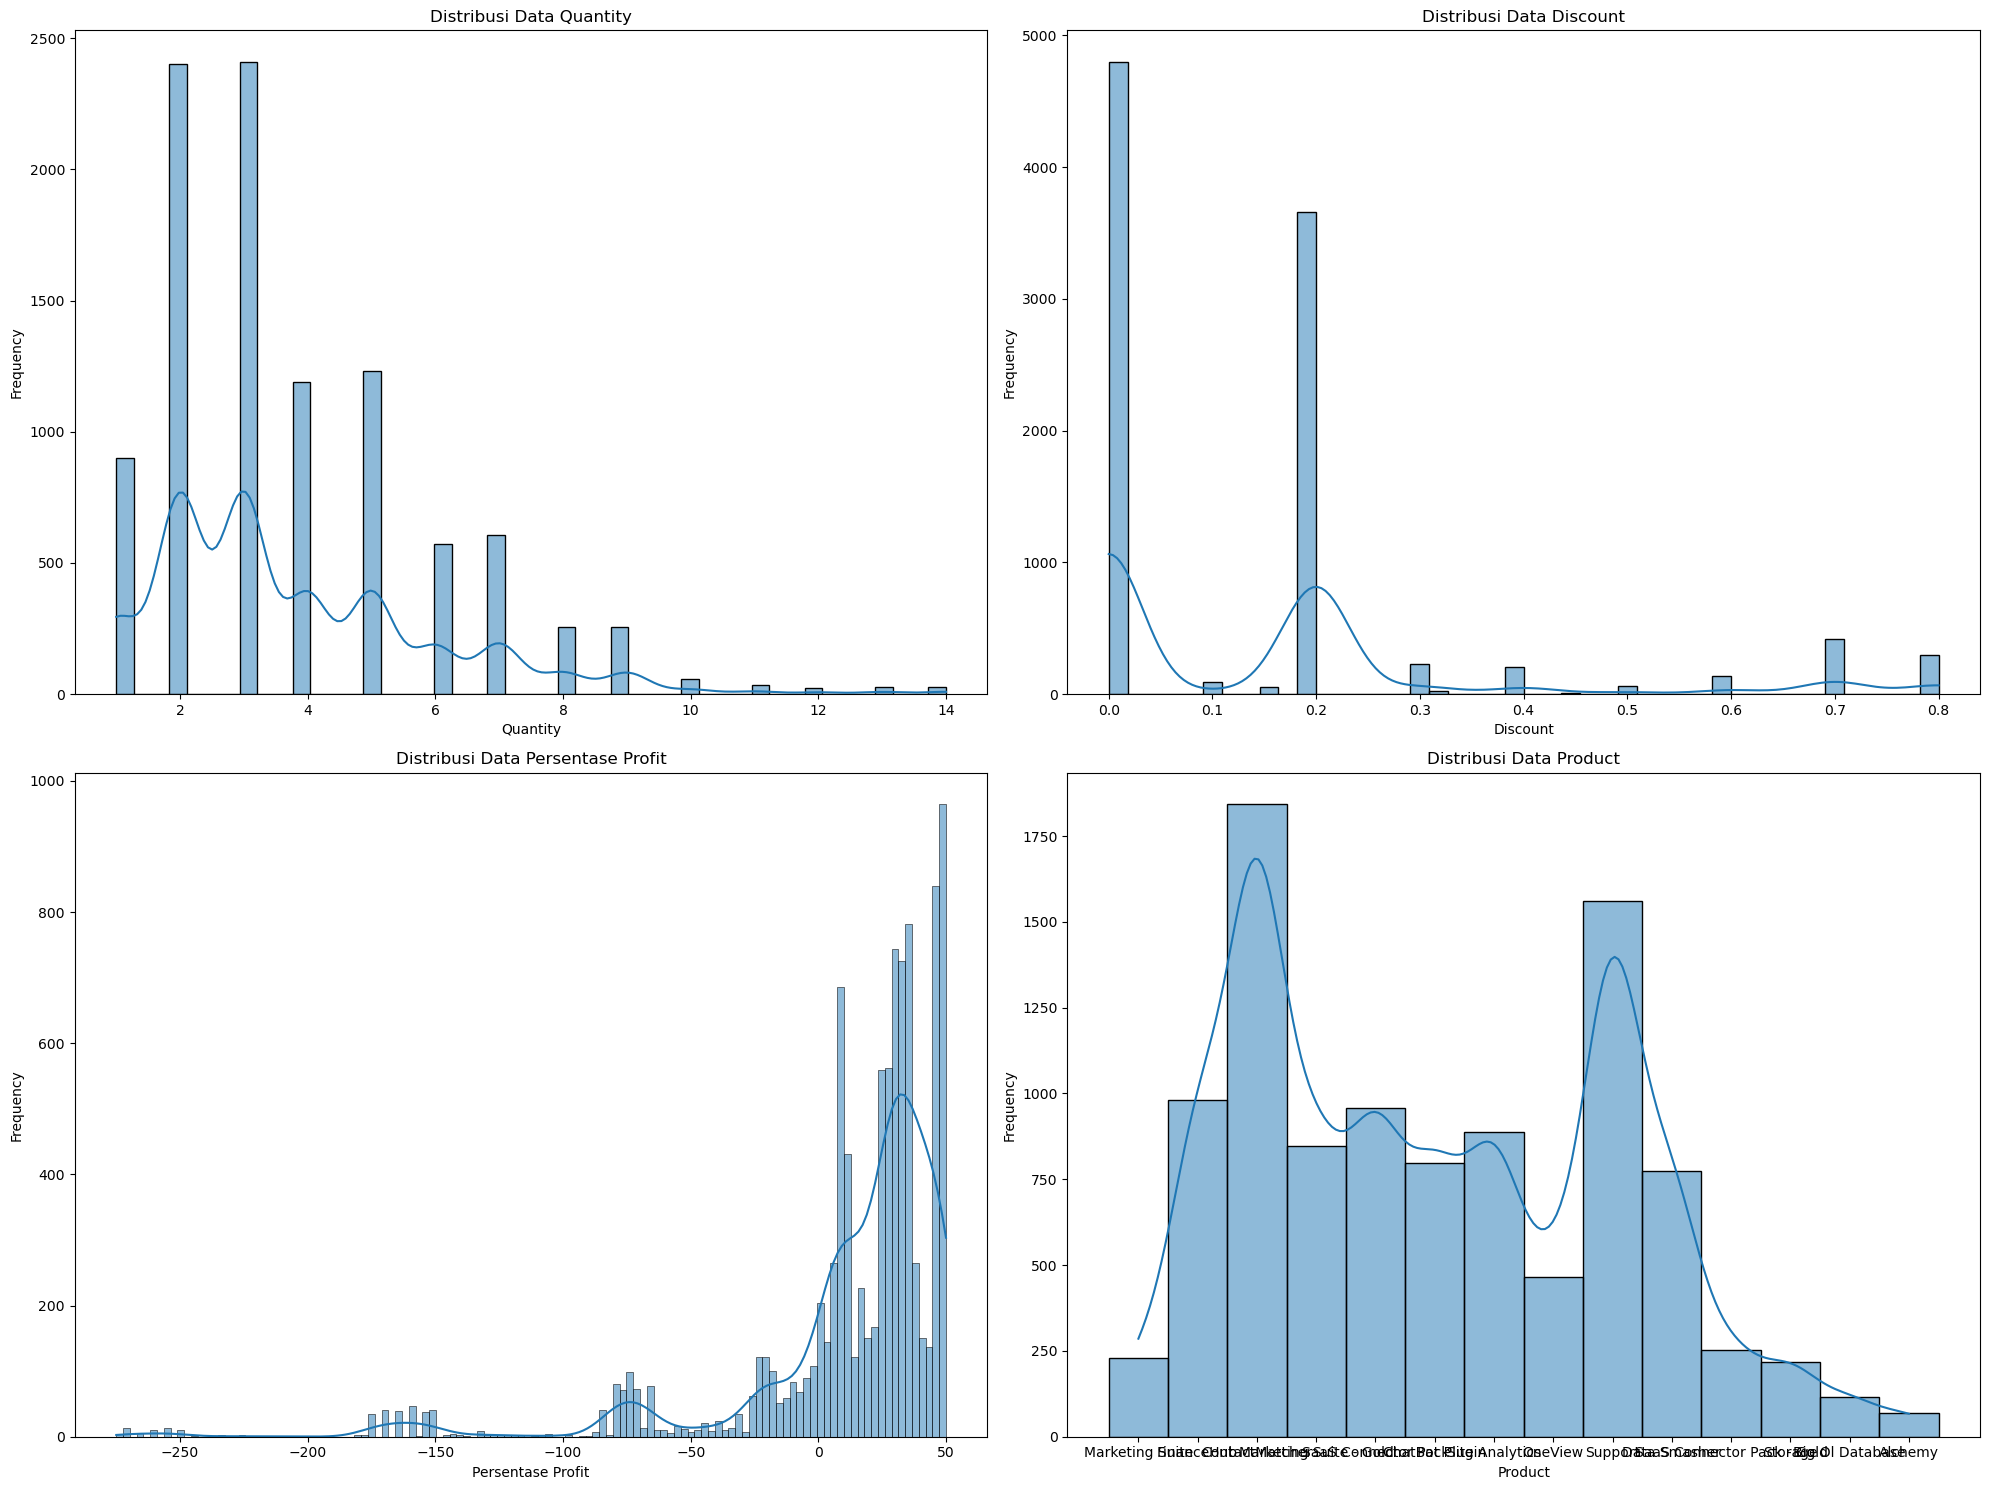

In [270]:
columns_to_plot = ['Quantity', 'Discount','Persentase Profit','Product'] #Sales dan profit pisah

plt.figure(figsize=(20, 15))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi Data {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

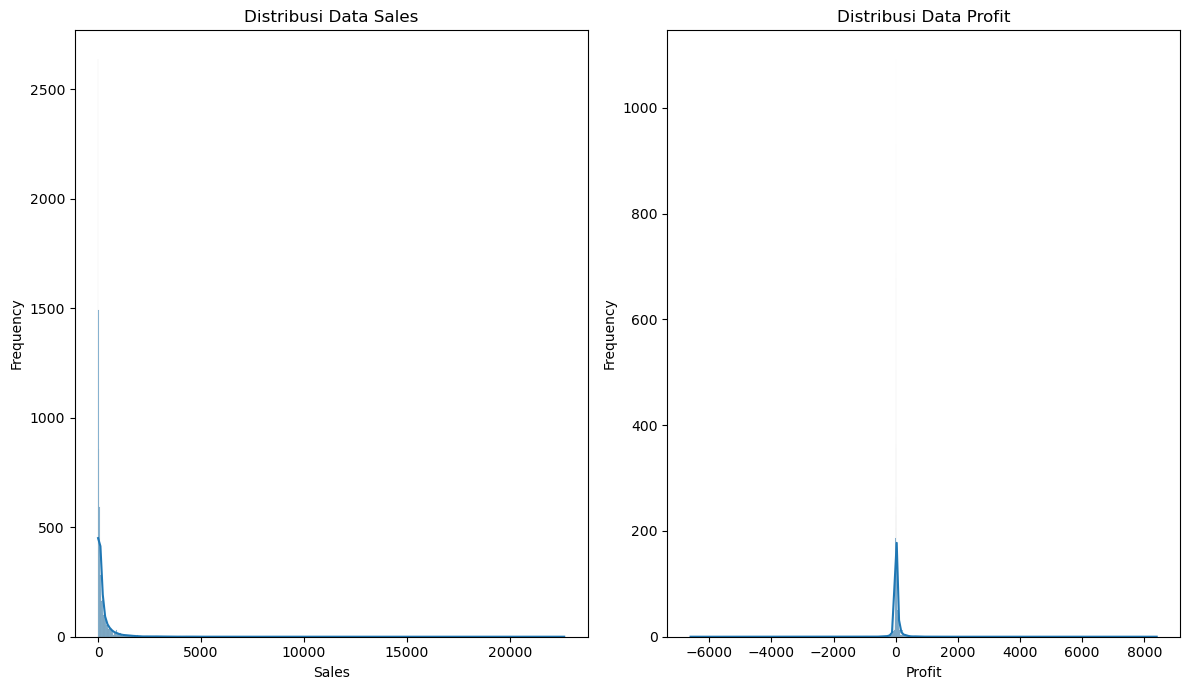

In [271]:
columns_to_plot = ['Sales', 'Profit']

plt.figure(figsize=(12, 7))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi Data {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [272]:
columns_to_test = ['Sales', 'Quantity', 'Discount', 'Profit', 'Persentase Profit']

for column in columns_to_test:
    stat, p_value = shapiro(df[column])

    alpha = 0.05

    print(f'Kolom {column}:')
    print(f'Statistic: {stat}, p-value: {p_value}')

    if p_value > alpha:
        print('Tidak dapat menolak hipotesis nol: Distribusi normal.')
    else:
        print('Tolak hipotesis nol: Distribusi tidak normal.')
    
    print('-' * 50)

Kolom Sales:
Statistic: 0.32332730293273926, p-value: 0.0
Tolak hipotesis nol: Distribusi tidak normal.
--------------------------------------------------
Kolom Quantity:
Statistic: 0.8823682069778442, p-value: 0.0
Tolak hipotesis nol: Distribusi tidak normal.
--------------------------------------------------
Kolom Discount:
Statistic: 0.7107365727424622, p-value: 0.0
Tolak hipotesis nol: Distribusi tidak normal.
--------------------------------------------------
Kolom Profit:
Statistic: 0.25709807872772217, p-value: 0.0
Tolak hipotesis nol: Distribusi tidak normal.
--------------------------------------------------
Kolom Persentase Profit:
Statistic: 0.6762534379959106, p-value: 0.0
Tolak hipotesis nol: Distribusi tidak normal.
--------------------------------------------------


Dari hasil uji normalitas yang telah dilakukan pada kelima kolom di atas (Sales, Quantity, Discount, Profit, Persentase Profit), dapat disimpulkan bahwa distribusi data pada masing-masing kolom tidak mengikuti distribusi normal. Hal ini diindikasikan oleh p-value yang sangat rendah (p-value < 0.05) pada setiap kolom, yang mengakibatkan penolakan hipotesis nol dan menyatakan bahwa kelima kolom terdistribusi tidak normal.

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [273]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(9994, 18)


,dataFeatures,dataType,null,unique,uniqueSample
0,Order ID,object,0,5009,"[APJ-2022-132479, AMER-2021-109736]"
1,Order Date,datetime64[ns],0,1237,"[2023-08-27T00:00:00.000000000, 2020-09-15T00:00:00.000000000]"
2,Contact Name,object,0,793,"[Jason Arnold, Sue Ince]"
3,Country,object,0,48,"[New Zealand, Portugal]"
4,City,object,0,262,"[Nizhny Novogorod, Mumbai]"
5,Region,object,0,3,"[APJ, EMEA]"
6,Subregion,object,0,12,"[NAMER, IND]"
7,Customer,object,0,99,"[Itochu, News Corp.]"
8,Customer ID,int64,0,99,"[1021, 1052]"
9,Industry,object,0,10,"[Retail, Communications]"


Setelah dipastikan bahwa dataset sudah bersih, mari kita simpan data tersebut di file baru

In [274]:
df.to_csv('SaaS-Sales-Cleaned.csv', index=False)

# Data Analysis
Setelah proses pembersihan data, mari kita lakukan analisis untuk mengetahui bagaimana tren penjualan pada perusahaan AWS SaaS ini dan mengetahui produk mana saja yang memiliki profit paling sediikit atau bahkan mengalami kerugian.

### Melakukan Analisis Profit Pada Produk

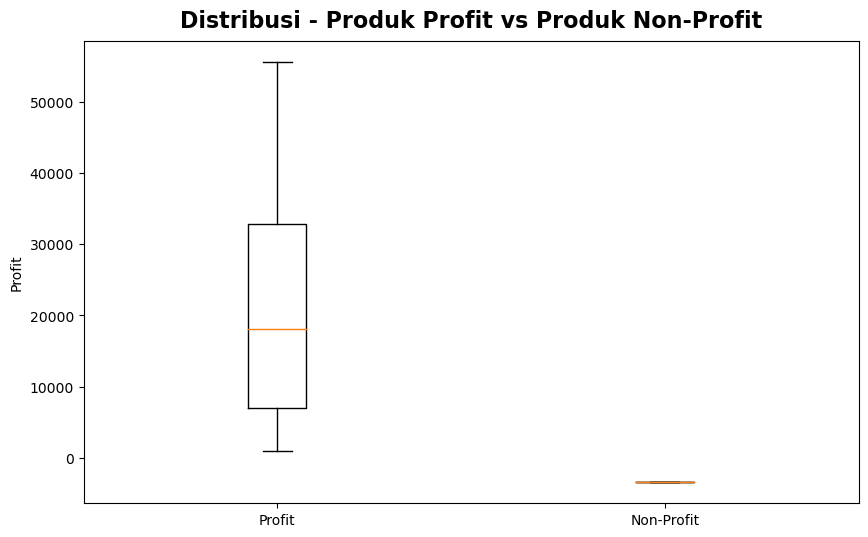

In [275]:
product_profit = df.groupby('Product')['Profit'].sum().reset_index()

threshold = 0
product_profit['Profitable'] = product_profit['Profit'] > threshold

profitable_products = product_profit[product_profit['Profitable'] == True]
non_profitable_products = product_profit[product_profit['Profitable'] == False]

profitable_stats = profitable_products['Profit'].describe()
non_profitable_stats = non_profitable_products['Profit'].describe()

plt.figure(figsize=(10, 6))
plt.boxplot([profitable_products['Profit'], non_profitable_products['Profit']], labels=['Profit', 'Non-Profit'])
plt.title('Distribusi - Produk Profit vs Produk Non-Profit', size=16, pad=10, fontweight='bold')
plt.ylabel('Profit')
plt.show()

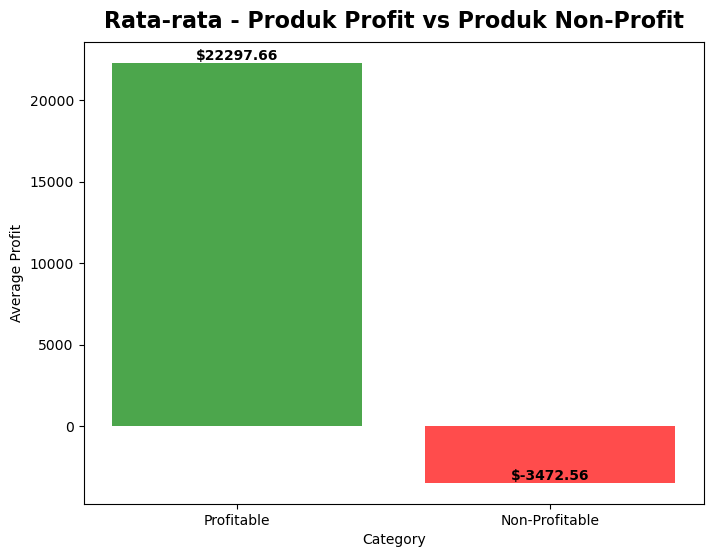

In [276]:
profitable_mean = profitable_stats['mean']
non_profitable_mean = non_profitable_stats['mean']

plt.figure(figsize=(8, 6))
bars = plt.bar(['Profitable', 'Non-Profitable'], [profitable_mean, non_profitable_mean],
               color=['green', 'red'], alpha=0.7)

plt.title('Rata-rata - Produk Profit vs Produk Non-Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Average Profit')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:.2f}',
             ha='center', va='bottom', fontweight='bold', color='black')

plt.show()

1. Hasil boxplot menunjukkan bahwa sebaran data produk yang memiliki keuntungan mencapai $50,000 dan sebagian besar distribusi keuntungan berada pada kisaran $8,000 - $30,000. Sedangkan produk yang mengalami negatif profit / kerugian berada dibawah angka $0

2. Melalui Barplot kita dapat mengetahui bahwa rata-rata keuntungan produk berada di 22,297 USD dan rata-rata kerugian produk ada di -3,472 USD

In [277]:
profit_product = df.groupby('Product')[['Profit']].sum()
total_profit = profit_product['Profit'].sum()
profit_product['percent_profit_product'] = (profit_product['Profit'] / total_profit) * 100
profit_product = profit_product.sort_values(by='percent_profit_product', ascending=False)
profit_product['percent_profit_product'] = profit_product['percent_profit_product'].apply(lambda x: f'{x:.2f}%')
profit_product['Profit'] = profit_product['Profit'].map('${:,.2f}'.format)

profit_product

,Profit,percent_profit_product
Product,,
Alchemy,"$55,617.82",19.42%
Site Analytics,"$44,515.73",15.54%
Data Smasher,"$41,936.64",14.64%
Support,"$32,864.47",11.48%
FinanceHub,"$32,136.42",11.22%
Marketing Suite - Gold,"$21,278.83",7.43%
OneView,"$18,138.01",6.33%
SaaS Connector Pack,"$13,059.14",4.56%
ContactMatcher,"$12,496.28",4.36%


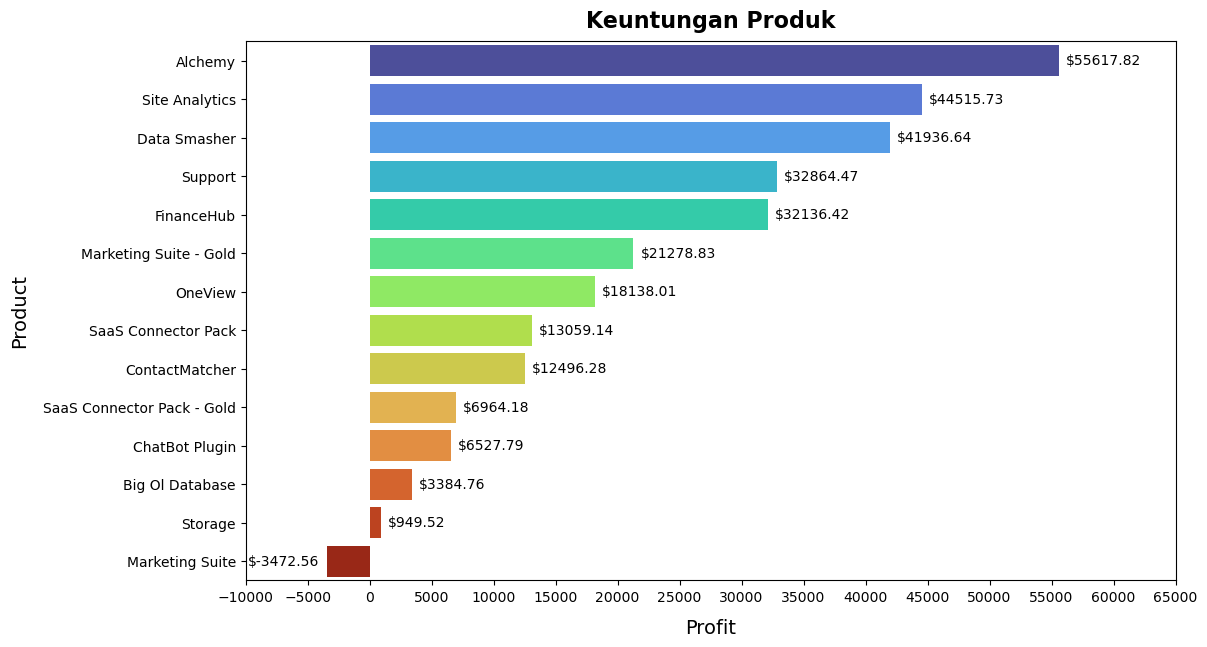

In [278]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=df,
    y='Product',
    x='Profit',
    ci=0,
    palette='turbo',  
    estimator='sum',
    order=df.groupby('Product')[['Profit']].sum().sort_values('Profit', ascending=False).index)
container = ax.containers[0]
profit_values = [f'${x:.2f}' for x in container.datavalues]
ax.bar_label(container, labels=profit_values, padding=5)
plt.title('Keuntungan Produk', size=16, pad=10, fontweight='bold')
plt.xlabel('Profit', size=14, labelpad=10)
plt.ylabel('Product', size=14, labelpad=10)
plt.xticks(range(-10000, 65001, 5000))
plt.show()

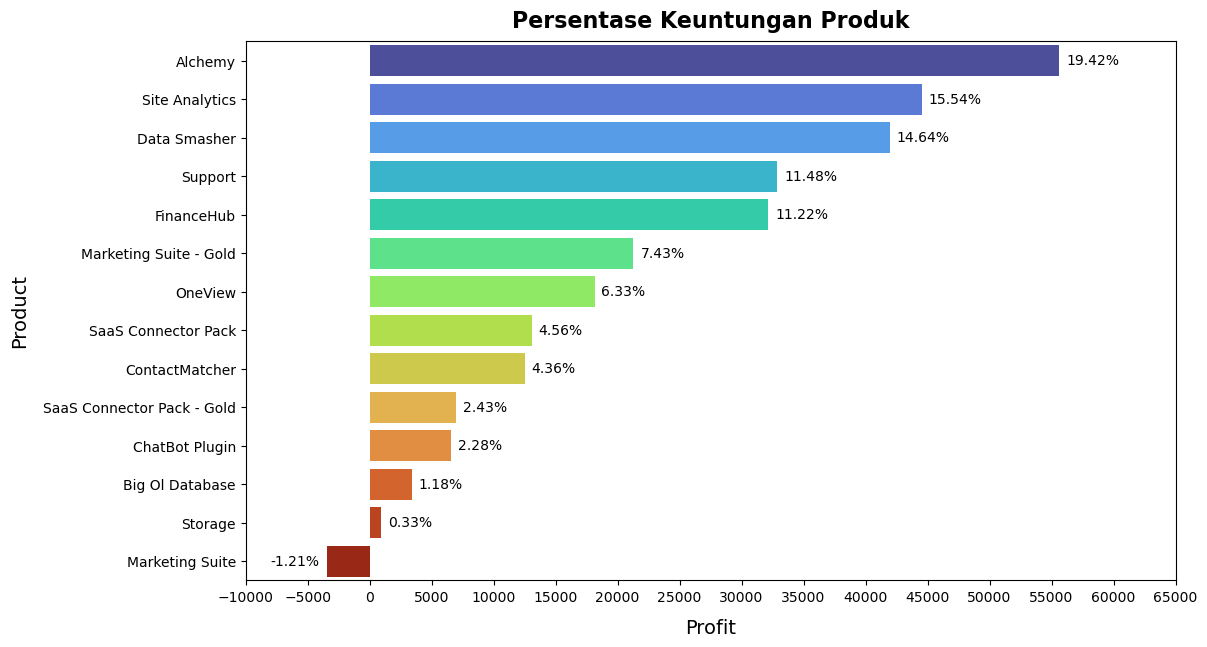

In [279]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=df,
    y='Product',
    x='Profit',
    ci=0,
    palette='turbo',
    estimator='sum',
    order=df.groupby('Product')[['Profit']].sum().sort_values('Profit', ascending=False).index)
container = ax.containers[0]

profit_percentages = [(x / df['Profit'].sum() * 100).round(2) for x in container.datavalues]
profit_percentages_str = [f'{x}%' for x in profit_percentages]

ax.bar_label(container, labels=profit_percentages_str, padding=5)
plt.title('Persentase Keuntungan Produk', size=16, pad=10, fontweight='bold')
plt.xlabel('Profit', size=14, labelpad=10)
plt.ylabel('Product', size=14, labelpad=10)
plt.xticks(range(-10000, 65001, 5000))
plt.show()

### Menghitung Jumlah Transaksi yang Mengalami Kerugian

In [280]:
df_loss = df[df["Profit"] < 0]
product_loss = df_loss['Product']

display (product_loss.unique(), product_loss.count())

array(['ContactMatcher', 'OneView', 'FinanceHub', 'Marketing Suite',
       'SaaS Connector Pack', 'Marketing Suite - Gold', 'Data Smasher',
       'Site Analytics', 'Big Ol Database', 'Support', 'Storage'],
      dtype=object)

1871

### Hasil Analisis Profit Pada Produk

Setelah melakukan analisis pada profit produk, dapat kita temukan bahwa 11 dari 14 produk pernah mengalami transaksi yang menghasilkan kerugian dengan total 1,871 transaksi dari total 9,994 transaksi. Akan tetapi hanya 1 produk yang sama sekali tidak menghasilkan profit bagi perusahaan.

Informasi yang dapat kita ambil dari hasil analisa di atas adalah:

1. Produk Alchemy, Site Analytics, dan Data Smasher merupakan 3 produk dengan kontribusi paling tinggi dalam menghasilkan profit secara keseluruhan untuk perusahaan.

2. Produk Storage merupakan produk dengan kontribusi paling rendah dalam menghasilkan profit untuk perusahaan

3. Marketing Suite menunjukkan persentase profit yang negatif, yang mengindikasikan bahwa produk ini beroperasi dalam keadaan rugi. Produk ini memiliki dampak negatif pada profitabilitas keseluruhan perusahaan.

kesimpulan yang dapat kita ambil adalah produk seperti Alchemy, Site Analytics, dan Data Smasher tampaknya menjadi produk yang paling menguntungkan bagi perusahaan AWS SaaS. Sementara itu, produk Marketing Suite berkinerja sangat buruk karena menghasilkan kerugian bagi perusahaan, yang mungkin perlu diselidiki lebih lanjut tentang komponen biaya, struktur pendapatan, dan kinerja bisnisnya. Keputusan yang diambil harus dipertimbangkan dengan cermat, dan selalu dengan fokus pada pemulihan keuntungan dan pertumbuhan jangka panjang perusahaan.

### Trend Penjualan dan Profitabilitas

Tren penjualan dan profitabilitas mengacu pada pergerakan keseluruhan angka penjualan dan keuntungan selama periode waktu tertentu, apakah meningkat, menurun, atau tetap stabil. Menganalisis tren penjualan dan keuntungan membantu dalam memahami kinerja produk, keuntungan, dan bisnis dari waktu ke waktu.

### Tren Penjualan dan Profitabilitas Setiap Tahun

Mari kita lihat rata-rata penjualan dan keuntungan perusahaan dalam setiap tahun mulai dari tahun 2020 - 2023

In [281]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Year'] = df['Order Date'].dt.to_period('Y')

df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Persentase Profit,Order Month,Order Year
Row ID,,,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,2022-11,2022
2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00,2022-11,2022
3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00,2022-06,2022
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00,2021-10,2021
5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25,2021-10,2021


In [282]:
df_sales_year = df.groupby('Order Year')[['Sales','Profit']].mean().reset_index()
df_sales_year['Sales'] = df_sales_year['Sales'].map('${:,.2f}'.format)
df_sales_year['Profit'] = df_sales_year['Profit'].map('${:,.2f}'.format)


df_sales_year.head()

,Order Year,Sales,Profit
0,2020,$242.97,$24.86
1,2021,$223.85,$29.31
2,2022,$235.84,$31.68
3,2023,$221.13,$28.17


In [283]:
df_profit_year = df.groupby('Order Year')[['Persentase Profit']].mean().reset_index()
df_profit_year['Persentase Profit'] = df_profit_year['Persentase Profit'].apply(lambda x: f"{x:.2f}%")
df_profit_year

,Order Year,Persentase Profit
0,2020,11.81%
1,2021,11.76%
2,2022,12.96%
3,2023,11.62%


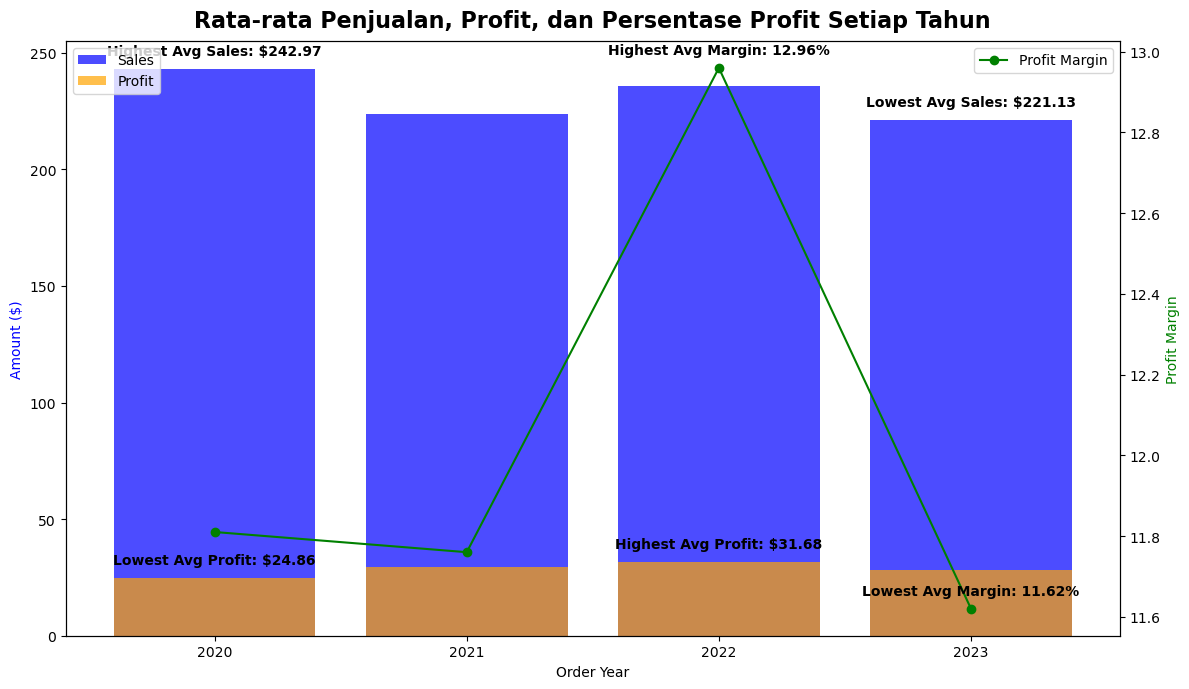

In [284]:
# Mengubah Sales dan Profit menjadi numerik
df_sales_year['Sales'] = df_sales_year['Sales'].str.replace('$', '').astype(float)
df_sales_year['Profit'] = df_sales_year['Profit'].str.replace('$', '').astype(float)
profit_margin_values = df_profit_year['Persentase Profit'].str.rstrip('%').astype(float)

# Membuat figure dan axes
fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar plot untuk Sales dan Profit
ax1.bar(df_sales_year['Order Year'].astype(str), df_sales_year['Sales'], label='Sales', color='blue', alpha=0.7)
ax1.bar(df_sales_year['Order Year'].astype(str), df_sales_year['Profit'], label='Profit', color='orange', alpha=0.7)

# Line plot untuk Profit Margin
ax2 = ax1.twinx()
ax2.plot(df_profit_year['Order Year'].astype(str), profit_margin_values, marker='o', linestyle='-', color='green', label='Profit Margin')

# Anotasi untuk Sales
max_index_sales = df_sales_year['Sales'].idxmax()
min_index_sales = df_sales_year['Sales'].idxmin()
ax1.annotate(f"Highest Avg Sales: ${df_sales_year['Sales'][max_index_sales]:,.2f}", 
             (df_sales_year['Order Year'].astype(str)[max_index_sales], df_sales_year['Sales'][max_index_sales]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
ax1.annotate(f"Lowest Avg Sales: ${df_sales_year['Sales'][min_index_sales]:,.2f}", 
             (df_sales_year['Order Year'].astype(str)[min_index_sales], df_sales_year['Sales'][min_index_sales]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

# Anotasi untuk Profit
max_index_profit = df_sales_year['Profit'].idxmax()
min_index_profit = df_sales_year['Profit'].idxmin()
ax1.annotate(f"Highest Avg Profit: ${df_sales_year['Profit'][max_index_profit]:,.2f}", 
             (df_sales_year['Order Year'].astype(str)[max_index_profit], df_sales_year['Profit'][max_index_profit]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
ax1.annotate(f"Lowest Avg Profit: ${df_sales_year['Profit'][min_index_profit]:,.2f}", 
             (df_sales_year['Order Year'].astype(str)[min_index_profit], df_sales_year['Profit'][min_index_profit]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

# Anotasi untuk Profit Margin
max_index_margin = profit_margin_values.idxmax()
min_index_margin = profit_margin_values.idxmin()
ax2.annotate(f"Highest Avg Margin: {df_profit_year['Persentase Profit'][max_index_margin]}", 
             (df_profit_year['Order Year'].astype(str)[max_index_margin], profit_margin_values[max_index_margin]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
ax2.annotate(f"Lowest Avg Margin: {df_profit_year['Persentase Profit'][min_index_margin]}", 
             (df_profit_year['Order Year'].astype(str)[min_index_margin], profit_margin_values[min_index_margin]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

# Pengaturan label dan judul
ax1.set_xlabel('Order Year')
ax1.set_ylabel('Amount ($)', color='blue')
ax2.set_ylabel('Profit Margin', color='green')
plt.title('Rata-rata Penjualan, Profit, dan Persentase Profit Setiap Tahun', size=16, pad=10, fontweight='bold')

# Menampilkan legenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Menampilkan plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Dari grafik di atas dapat kita lihat bahwa rata-rata penjualan tertinggi terjadi pada tahun 2020 dengan nilai $242.97, namun tahun 2020 menjadi tahun dimana rata-rata keuntungan paling rendah dengan rata-rata keuntungan $24.86. Tahun 2023 menjadi tahun dengan rata-rata penjualan paling rendah dengan rata-rata penjualan $221.13 meskipun tahun 2023 menjadi tahun dengan rata-rata penjualan paling rendah, jumlah rata-rata keuntungan yang didapat oleh perusahaan masih lebih baik daripada tahun 2020 yang menjadi tahun dengan rata-rata penjualan paling tinggi, namun persentase profit yang didapat pada tahun 2023 adalah yang paling rendah dengan nilai persentase keuntungan 11.62%. Tahun 2022 menjadi tahun dimana rata-rata persentase keuntungan paling tinggi dengan persentase 12.56%. Seperti yang kita ketahui bahwa tahun 2022 merupakan tahun dimana rata-rata keuntungan yang didapat adalah yang paling tinggi dengan nilai $31.68, ini mengindikasikan bahwa pada tahun ini strategi penjualan yang dilakukan dapat dikatakan berhasil.

In [285]:
df_discount_year = df.groupby("Order Year")[["Discount"]].mean().reset_index()
df_discount_year['Discount'] = (df_discount_year['Discount'] * 100).apply(lambda x: f"{x:.2f}%")
df_discount_year.head()

,Order Year,Discount
0,2020,15.83%
1,2021,15.56%
2,2022,15.47%
3,2023,15.65%


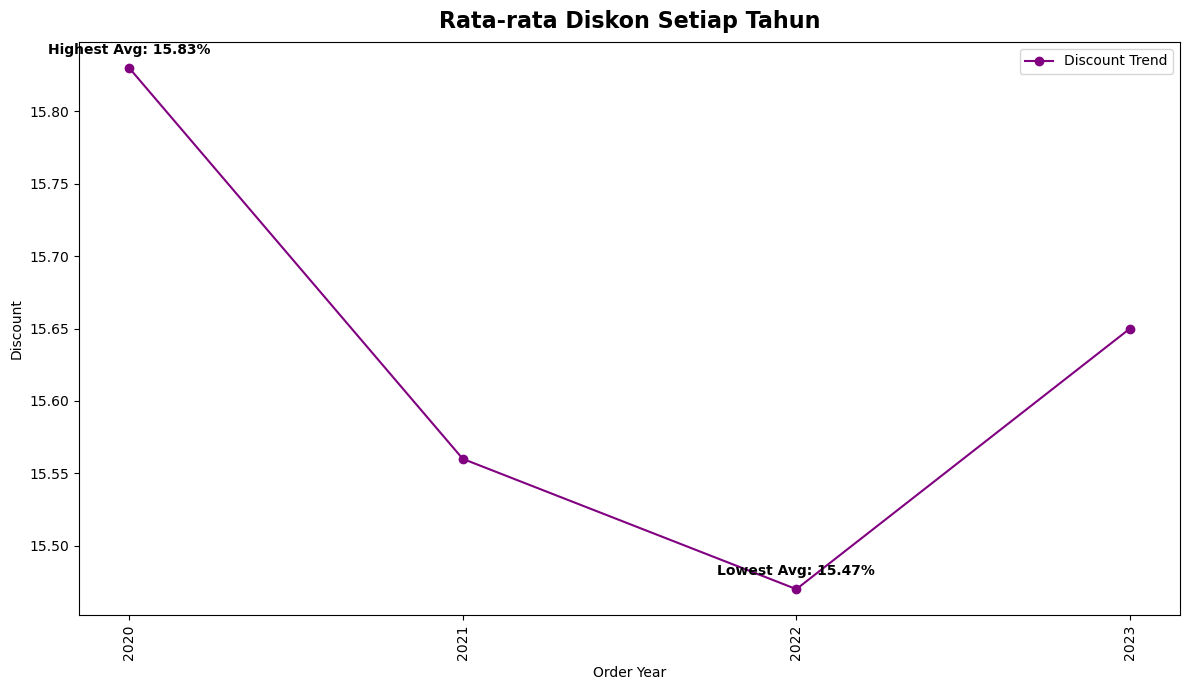

In [286]:
plt.figure(figsize=(12, 7))
discount_values = df_discount_year['Discount'].str.replace('%', '').astype(float)
plt.plot(df_discount_year['Order Year'].astype(str), discount_values, marker='o', linestyle='-', color='purple', label='Discount Trend')

max_index = discount_values.idxmax()
min_index = discount_values.idxmin()

plt.annotate(f"Highest Avg: {df_discount_year['Discount'][max_index]}", 
             (df_discount_year['Order Year'].astype(str)[max_index], discount_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
plt.annotate(f"Lowest Avg: {df_discount_year['Discount'][min_index]}", 
             (df_discount_year['Order Year'].astype(str)[min_index], discount_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Order Year')
plt.ylabel('Discount')
plt.title('Rata-rata Diskon Setiap Tahun', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

Menurut lineplot di atas, kita dapat mengetahui bahwa tahun 2020 menjadi tahun dengan rata-rata diskon paling tinggi dengan nilai 15.83% dan tahun 2022 menjadi tahun dengan rata-rata diskon paling rendah dengan nilai 15.47%. Ini dapat menjadi alasan mengapa tahun 2020 menjadi tahun dengan rata-rata penjualan tertinggi dan tahun 2022 menjadi tahun dengan rata-rata keuntungan paling tinggi.

### Tren Penjualan dan Profitabilitas Setiap Bulan

Mari kita lihat rata-rata penjualan dan keuntungan perusahaan dalam setiap bulan mulai dari Januari 2020 - Desember 2023

In [287]:
df_sales = df.groupby('Order Month')[['Sales','Profit']].mean().reset_index()
df_sales['Sales'] = df_sales['Sales'].map('${:,.2f}'.format)
df_sales['Profit'] = df_sales['Profit'].map('${:,.2f}'.format)

df_sales.head()

,Order Month,Sales,Profit
0,2020-01,$178.80,$31.37
1,2020-02,$102.35,$18.42
2,2020-03,$354.72,$3.18
3,2020-04,$209.60,$25.84
4,2020-05,$193.84,$22.45


In [288]:
df_profit_month = df.groupby('Order Month')[['Persentase Profit']].mean().reset_index()
df_profit_month['Persentase Profit'] = df_profit_month['Persentase Profit'].apply(lambda x: f"{x:.2f}%")
df_profit_month.head()

,Order Month,Persentase Profit
0,2020-01,13.01%
1,2020-02,5.10%
2,2020-03,13.10%
3,2020-04,22.89%
4,2020-05,12.08%


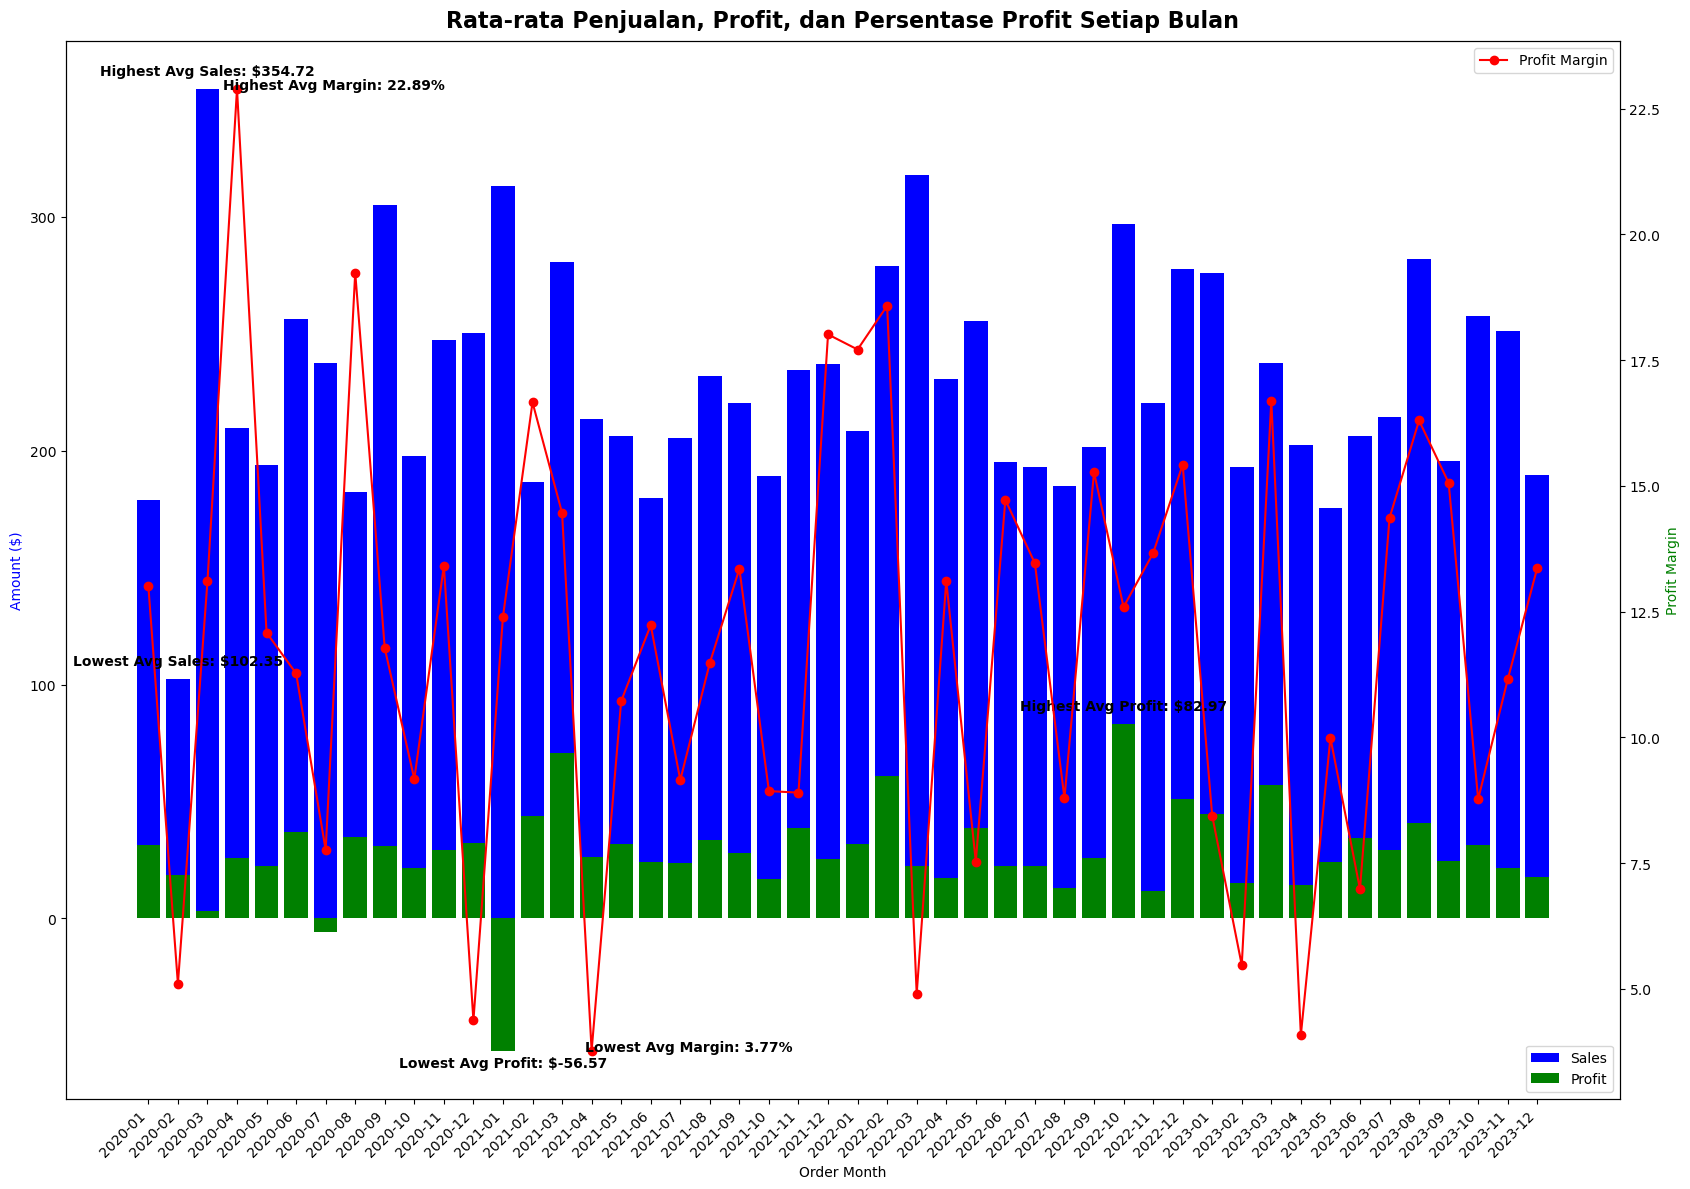

In [289]:
# Mengubah Sales dan Profit menjadi numerik
df_sales['Sales'] = df_sales['Sales'].str.replace('$', '').astype(float)
df_sales['Profit'] = df_sales['Profit'].str.replace('$', '').astype(float)
profit_margin_valuesM = df_profit_month['Persentase Profit'].str.rstrip('%').astype(float)

# Membuat figure dan axes
fig, ax1 = plt.subplots(figsize=(17, 12))

# Bar plot untuk Sales dan Profit
ax1.bar(df_sales['Order Month'].astype(str), df_sales['Sales'], label='Sales', color='blue')
ax1.bar(df_sales['Order Month'].astype(str), df_sales['Profit'], label='Profit', color='green')

# Line plot untuk Profit Margin
ax2 = ax1.twinx()
ax2.plot(df_profit_month['Order Month'].astype(str), profit_margin_valuesM, marker='o', linestyle='-', color='red', label='Profit Margin')

# Anotasi untuk Sales
max_index_sales = df_sales['Sales'].idxmax()
min_index_sales = df_sales['Sales'].idxmin()
ax1.annotate(f"Highest Avg Sales: ${df_sales['Sales'][max_index_sales]:,.2f}", 
             (df_sales['Order Month'].astype(str)[max_index_sales], df_sales['Sales'][max_index_sales]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
ax1.annotate(f"Lowest Avg Sales: ${df_sales['Sales'][min_index_sales]:,.2f}", 
             (df_sales['Order Month'].astype(str)[min_index_sales], df_sales['Sales'][min_index_sales]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

# Anotasi untuk Profit
max_index_profit = df_sales['Profit'].idxmax()
min_index_profit = df_sales['Profit'].idxmin()
ax1.annotate(f"Highest Avg Profit: ${df_sales['Profit'][max_index_profit]:,.2f}", 
             (df_sales['Order Month'].astype(str)[max_index_profit], df_sales['Profit'][max_index_profit]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
ax1.annotate(f"Lowest Avg Profit: ${df_sales['Profit'][min_index_profit]:,.2f}", 
             (df_sales['Order Month'].astype(str)[min_index_profit], df_sales['Profit'][min_index_profit]),
             textcoords="offset points", xytext=(0,-12), ha='center', fontsize=10, fontweight='bold')

# Anotasi untuk Profit Margin
max_index_margin = profit_margin_valuesM.idxmax()
min_index_margin = profit_margin_valuesM.idxmin()
ax2.annotate(f"Highest Avg Margin: {df_profit_month['Persentase Profit'][max_index_margin]}", 
             (df_profit_month['Order Month'].astype(str)[max_index_margin], profit_margin_valuesM[max_index_margin]),
             textcoords="offset points", xytext=(70,0), ha='center', fontsize=10, fontweight='bold')
ax2.annotate(f"Lowest Avg Margin: {df_profit_month['Persentase Profit'][min_index_margin]}", 
             (df_profit_month['Order Month'].astype(str)[min_index_margin], profit_margin_valuesM[min_index_margin]),
             textcoords="offset points", xytext=(70,0), ha='center', fontsize=10, fontweight='bold')

# Pengaturan label dan judul
ax1.set_xlabel('Order Month')
ax1.set_ylabel('Amount ($)', color='blue')
ax2.set_ylabel('Profit Margin', color='green')
plt.title('Rata-rata Penjualan, Profit, dan Persentase Profit Setiap Bulan', size=16, pad=10, fontweight='bold')

# Menampilkan legenda
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

# Memiringkan label pada sumbu x
ax1.set_xticklabels(df_sales['Order Month'].astype(str), rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan informasi rata-rata penjualan dan keuntungan perusahaan setiap bulan, kita dapat menarik informasi sebagai berikut:

Penjualan:
1. Rata-rata penjualan paling rendah terjadi pada bulan Februari 2020 dengan rata-rata nilai penjualan $102.35, ini menunjukkan bahwa penjualan pada bulan ini sangat rendah dan perlu upaya pemasaran yang lebih baik.

2. Rata-rata penjualan tertinggi terjadi pada bulan Maret 2020 dengan rata-rata nilai penjualan $354.72, hal ini dapat mengindikasikan strategi penjualan yang sukses atau sedang terjadinya lonjakan permintaan di pasar.

3. Angka rata-rata penjualan setiap bulan berfluktuasi secara signifikan selama periode Januari 2020 hingga Desember 2023. Hal ini dapat disebabkan oleh berbagai faktor seperti tren musiman, strategi pemasaran yang tidak berjalan lancar setiap bulan, dan perubahan kondisi pasar.

Profit:
1. Rata-rata keuntungan tertinggi terjadi pada bulan Oktober 2022 dengan nilai rata-rata keuntungan sebesar $82.97, ini mengindikasikan bahwa strategi pemasaran dan perjualan yang berhasil atau sedang terjadinya lonjakan permintaan di pasar. Karena seperti yang dapat kita lihat pada grafik di atas terjadi kenaikan penjualan yang signifikan pada bulan ini dari bulan sebelumnya.

2. Rata-rata keuntungan paling rendah terjadi pada bulan Januari 2021 dengan nilai keuntungan rata-rata $-56.57 atau dengan kata lain pada bulan ini perusahaan mengalami kerugian. Akan tetapi yang harus diperhatikan adalah nilai rata-rata penjualan pada bulan ini cukup tinggi, hal ini dapat menunjukkan apakah pada periode ini terjadi peningkatan biaya pada perusahaan? atau strategi bisnis yang salah sehingga meskipun penjualan meningkat akan tetapi perusahaan mengalami kerugian.

3. Rata-rata keuntungan setiap bulan perusahaan berfluktuasi secara signifikan dari bulan Januari 2020 hingga bulan April 2021, dan terjadi kerugian pada bulan Juli 2020 dan Januari 2021. Pada bulan Mei 2021 hingga Desember 2023 keuntungan rata-rata perusahaan berangsur stabil dan tidak mengalami kerugian pada periode ini.

Persentase Profit:

1. Persentase profit tertinggi terjadi pada bulan April 2020 dengan rata-rata persentase keuntungan sebesar 22.89% dari total penjualan bulan ini. Sedangkan persentase profit paling rendah terjadi pada bulan April 2021 dengan rata-rata persentase keuntungan 3.77% dari penjualan bulan tersebut.

2. Pada bulan April 2020 terjadi penurunan penjualan yang signifikan dari bulan sebelumnya, meskipun terjadi penurunan penjualan pada bulan tersebut akan tetapi persentase profit yang dihasilkan cukup tinggi. Faktor-faktor yang mungkin menyebabkan penurunan penjualan tetapi meningkatkan persentase profit ini bisa jadi karena peningkatan harga jual, pengelolaan biaya yang lebih baik, atau penjualan produk dengan margin keuntungan lebih tinggi.

### Menghitung rata-rata jumlah diskon yang diberikan setiap bulan

In [290]:
df_discount = df.groupby("Order Month")[["Discount"]].mean().reset_index()
df_discount['Discount'] = (df_discount['Discount'] * 100).apply(lambda x: f"{x:.2f}%")
df_discount.head()

,Order Month,Discount
0,2020-01,12.63%
1,2020-02,17.55%
2,2020-03,16.75%
3,2020-04,11.00%
4,2020-05,15.53%


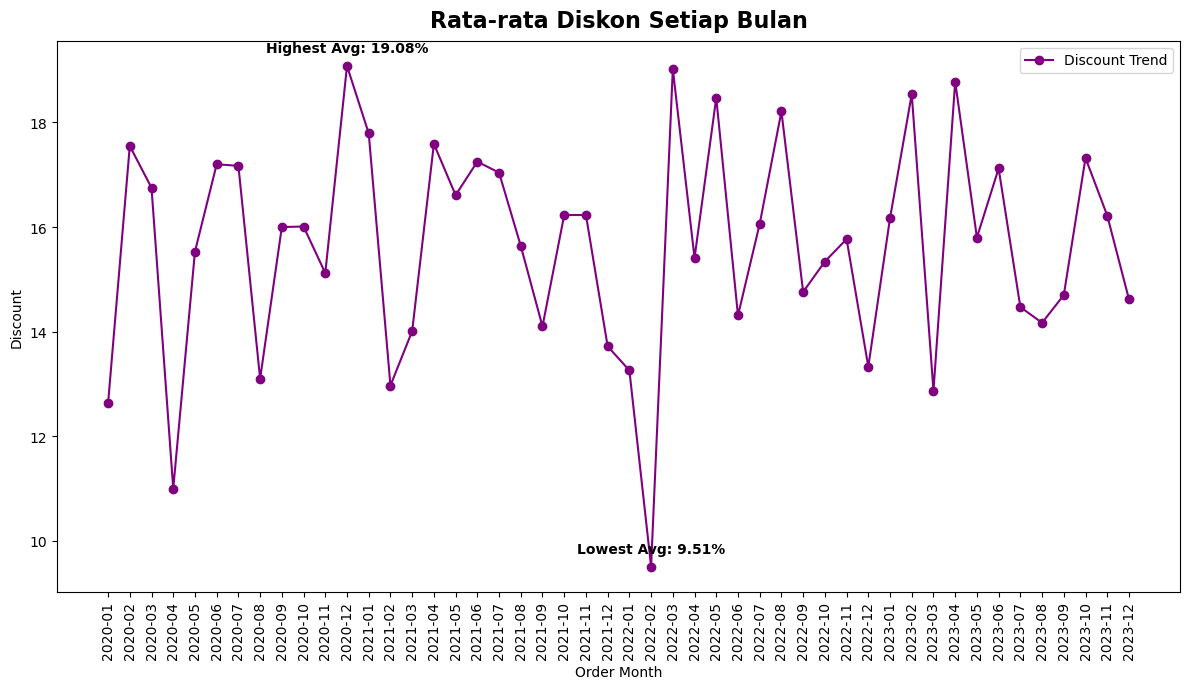

In [291]:
plt.figure(figsize=(12, 7))
discount_values = df_discount['Discount'].str.replace('%', '').astype(float)
plt.plot(df_discount['Order Month'].astype(str), discount_values, marker='o', linestyle='-', color='purple', label='Discount Trend')

max_index = discount_values.idxmax()
min_index = discount_values.idxmin()

plt.annotate(f"Highest Avg: {df_discount['Discount'][max_index]}", 
             (df_discount['Order Month'].astype(str)[max_index], discount_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
plt.annotate(f"Lowest Avg: {df_discount['Discount'][min_index]}", 
             (df_discount['Order Month'].astype(str)[min_index], discount_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Order Month')
plt.ylabel('Discount')
plt.title('Rata-rata Diskon Setiap Bulan', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

Menurut hasil analisa di atas dapat kita tarik informasi bahwa rata-rata diskon setiap bulan yang diberikan oleh perusahaan sangat bervariasi mulai dari rata-rata diskon paling rendah dengan nilai 9.51% pada bulan februari 2022, hingga rata-rata diskon paling tinggi yang diberikan pada bulan Desember 2020 sebesar 19.08%. Selain itu ada kemungkinan turunnya jumlah penjualan yang disertai dengan kenaikan persentase profit pada bulan April 2020 dikarenakan turunnya nilai diskon yang sangat signifikan pada bulan tersebut.

### Menganalisis Dampak Diskon terhadap Profit

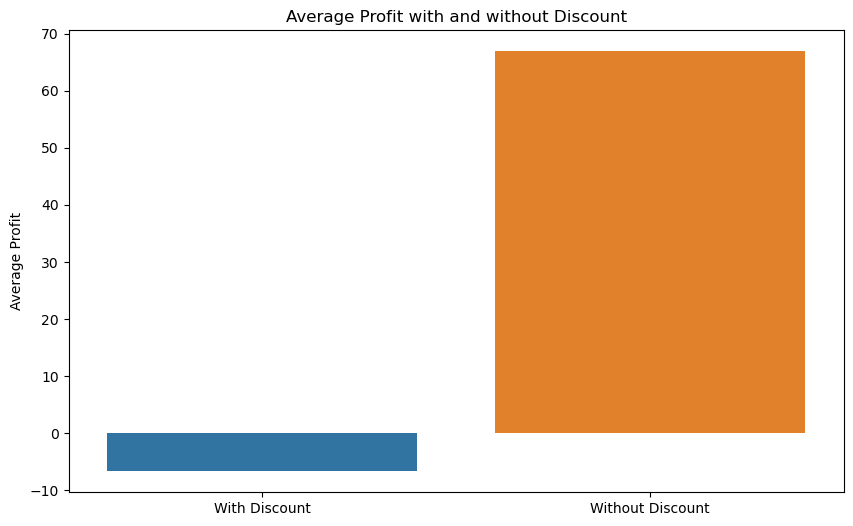

Test Statistic: 6266805.5, p-value: 0.0
Tolak hipotesis nol: Terdapat perbedaan signifikan antara profit tanpa diskon dan profit dengan diskon.


In [292]:
# Menghitung rata-rata profit dengan dan tanpa diskon
average_profit_with_discount = df[df['Discount'] > 0]['Profit'].mean()
average_profit_without_discount = df[df['Discount'] == 0]['Profit'].mean()

# Visualisasi perbandingan rata-rata profit
plt.figure(figsize=(10, 6))
sns.barplot(x=['With Discount', 'Without Discount'], y=[average_profit_with_discount, average_profit_without_discount])
plt.title('Average Profit with and without Discount')
plt.ylabel('Average Profit')
plt.show()

# Uji statistik untuk memeriksa signifikansi perbedaan profit dengan dan tanpa diskon menggunakan metode Mann-Whitney
# H0: Tidak ada perbedaan signifikan antara profit dengan dan tanpa diskon
# H1: Ada perbedaan signifikan antara profit dengan dan tanpa diskon
statistic, p_value = mannwhitneyu(df[df['Discount'] > 0]['Profit'], df[df['Discount'] == 0]['Profit'])
print(f'Test Statistic: {statistic}, p-value: {p_value}')

# Menentukan tingkat signifikansi (cth: 0.05)
alpha = 0.05
if p_value < alpha:
    print("Tolak hipotesis nol: Terdapat perbedaan signifikan antara profit tanpa diskon dan profit dengan diskon.")
else:
    print("Terima hipotesis nol: Tidak terdapat perbedaan signifikan antara profit tanpa diskon dan profit dengan diskon.")

Menurut hasil uji statistik di atas nilai p-value adalah menolak H0. Diskon kemungkinan memiliki dampak signifikan terhadap profit. Ini dapat diartikan bahwa diskon mungkin meningkatkan atau mengurangi profit secara signifikan, tergantung pada arah perubahan yang diamati.

## Kerugian Marketing Suite

In [293]:
df_msuite = df[df["Product"] == "Marketing Suite"]

# Display the updated DataFrame
df_msuite.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Persentase Profit,Order Month,Order Year
Row ID,,,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,2022-11,2022
28,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522,-54.00,2021-09,2021
39,APJ-2021-117415,2021-12-27,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764,-8.82,2021-12,2021
190,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920,12.50,2021-10,2021
193,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764,7.50,2021-10,2021


In [294]:
df_msuite.describe()

,Order Date,Customer ID,Sales,Quantity,Discount,Profit,Persentase Profit
count,228,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,2022-05-04 01:34:44.210526208,1053.254386,503.859633,3.807018,0.211140,-15.230509,-12.663904
min,2020-01-14 00:00:00,1002.000000,35.490000,1.000000,0.000000,-1665.052200,-210.000000
25%,2021-08-03 00:00:00,1026.000000,190.500000,2.000000,0.000000,-42.631200,-13.885000
50%,2022-06-16 12:00:00,1053.000000,306.820250,3.000000,0.200000,4.133300,1.180000
75%,2023-05-03 00:00:00,1080.250000,522.285000,5.000000,0.320000,40.054100,12.500000
max,2023-12-31 00:00:00,1101.000000,4404.900000,13.000000,0.700000,1013.127000,29.000000
std,NaN,30.470557,638.748523,2.283352,0.191913,182.034224,46.947295


Dari hasil pengumpulan data pada produk Marketing Suite, dapat kita lihat bahwa dari 228 penjualan, rata-rata profit yang didapat adalah $-15.23 atau dapat diartikan bahwa rata-rata transaksi yang terjadi pada produk ini mengalami kerugian sebesar 15.23 USD.

### Tren Penjualan dan Profitabilitas Marketing Suite

In [322]:
df_msuite_year = df_msuite.groupby('Order Year')[["Sales","Profit"]].mean().reset_index()
df_msuite_year['Sales'] = df_msuite_year['Sales'].map('${:,.2f}'.format)
df_msuite_year['Profit'] = df_msuite_year['Profit'].map('${:,.2f}'.format)

df_msuite_year.head()

,Order Year,Sales,Profit
0,2020,$541.53,$-9.36
1,2021,$631.86,$-45.17
2,2022,$486.58,$3.93
3,2023,$395.06,$-7.68


In [323]:
df_msuite_profit_year = df_msuite.groupby('Order Year')[['Persentase Profit']].mean().reset_index()
df_msuite_profit_year['Persentase Profit'] = df_msuite_profit_year['Persentase Profit'].apply(lambda x: f"{x:.2f}%")
df_msuite_profit_year

,Order Year,Persentase Profit
0,2020,-10.04%
1,2021,-16.55%
2,2022,-7.09%
3,2023,-14.78%


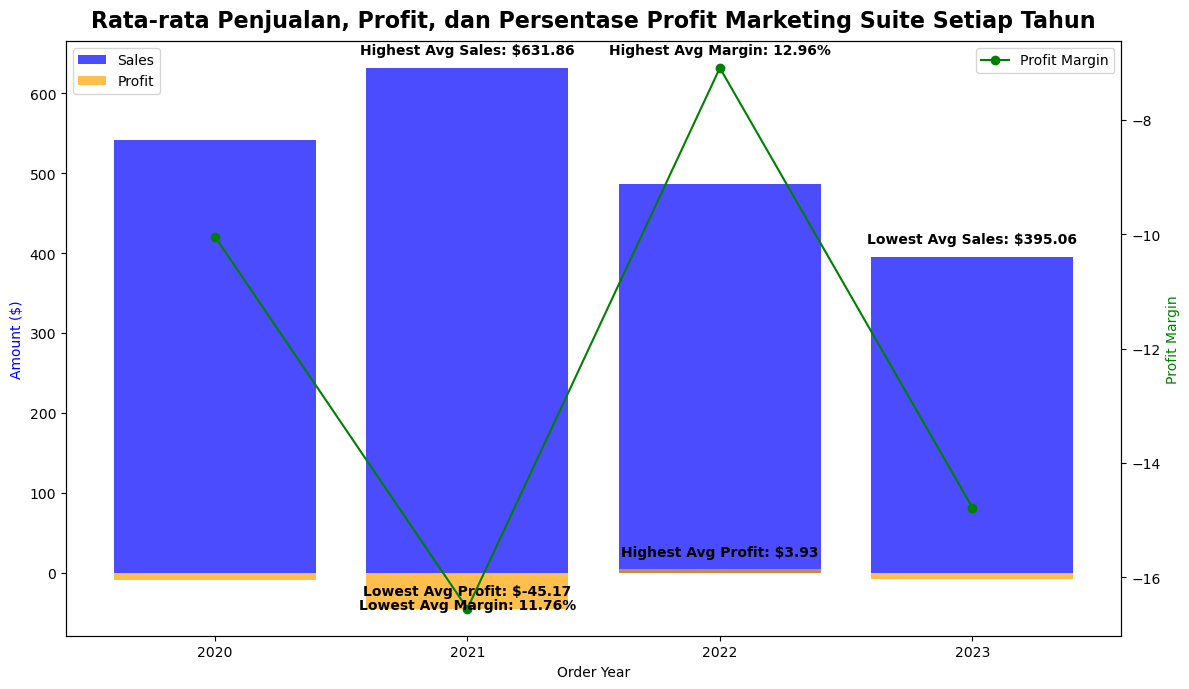

In [324]:
# Mengubah Sales dan Profit menjadi numerik
df_msuite_year['Sales'] = df_msuite_year['Sales'].str.replace('$', '').astype(float)
df_msuite_year['Profit'] = df_msuite_year['Profit'].str.replace('$', '').astype(float)
profit_margin_values = df_msuite_profit_year['Persentase Profit'].str.rstrip('%').astype(float)

# Membuat figure dan axes
fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar plot untuk Sales dan Profit
ax1.bar(df_msuite_year['Order Year'].astype(str), df_msuite_year['Sales'], label='Sales', color='blue', alpha=0.7)
ax1.bar(df_msuite_year['Order Year'].astype(str), df_msuite_year['Profit'], label='Profit', color='orange', alpha=0.7)

# Line plot untuk Profit Margin
ax2 = ax1.twinx()
ax2.plot(df_profit_year['Order Year'].astype(str), profit_margin_values, marker='o', linestyle='-', color='green', label='Profit Margin')

# Anotasi untuk Sales
max_index_sales = df_msuite_year['Sales'].idxmax()
min_index_sales = df_msuite_year['Sales'].idxmin()
ax1.annotate(f"Highest Avg Sales: ${df_msuite_year['Sales'][max_index_sales]:,.2f}", 
             (df_msuite_year['Order Year'].astype(str)[max_index_sales], df_msuite_year['Sales'][max_index_sales]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
ax1.annotate(f"Lowest Avg Sales: ${df_msuite_year['Sales'][min_index_sales]:,.2f}", 
             (df_msuite_year['Order Year'].astype(str)[min_index_sales], df_msuite_year['Sales'][min_index_sales]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

# Anotasi untuk Profit
max_index_profit = df_msuite_year['Profit'].idxmax()
min_index_profit = df_msuite_year['Profit'].idxmin()
ax1.annotate(f"Highest Avg Profit: ${df_msuite_year['Profit'][max_index_profit]:,.2f}", 
             (df_msuite_year['Order Year'].astype(str)[max_index_profit], df_msuite_year['Profit'][max_index_profit]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
ax1.annotate(f"Lowest Avg Profit: ${df_msuite_year['Profit'][min_index_profit]:,.2f}", 
             (df_msuite_year['Order Year'].astype(str)[min_index_profit], df_msuite_year['Profit'][min_index_profit]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

# Anotasi untuk Profit Margin
max_index_margin = profit_margin_values.idxmax()
min_index_margin = profit_margin_values.idxmin()
ax2.annotate(f"Highest Avg Margin: {df_profit_year['Persentase Profit'][max_index_margin]}", 
             (df_profit_year['Order Year'].astype(str)[max_index_margin], profit_margin_values[max_index_margin]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
ax2.annotate(f"Lowest Avg Margin: {df_profit_year['Persentase Profit'][min_index_margin]}", 
             (df_profit_year['Order Year'].astype(str)[min_index_margin], profit_margin_values[min_index_margin]),
             textcoords="offset points", xytext=(0,0), ha='center', fontsize=10, fontweight='bold')

# Pengaturan label dan judul
ax1.set_xlabel('Order Year')
ax1.set_ylabel('Amount ($)', color='blue')
ax2.set_ylabel('Profit Margin', color='green')
plt.title('Rata-rata Penjualan, Profit, dan Persentase Profit Marketing Suite Setiap Tahun', size=16, pad=10, fontweight='bold')

# Menampilkan legenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Menampilkan plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Penjualan tertinggi dari produk Marketing Suite terjadi pada tahun 2021 dengan rata-rata penjualan $631.86, namun pada tahun ini juga menjadi tahun dengan rata-rata keuntungan paling rendah dengan -$45.17 atau dengan kata lain rata-rata kerugian pada tahun ini adalah $45.17 dalam setiap transaksi.

In [325]:
df_msuite_discount_year = df_msuite.groupby("Order Year")[["Discount"]].mean().reset_index()
df_msuite_discount_year['Discount'] = (df_msuite_discount_year['Discount'] * 100).apply(lambda x: f"{x:.2f}%")
df_msuite_discount_year.head()

,Order Year,Discount
0,2020,20.57%
1,2021,22.85%
2,2022,19.02%
3,2023,21.47%


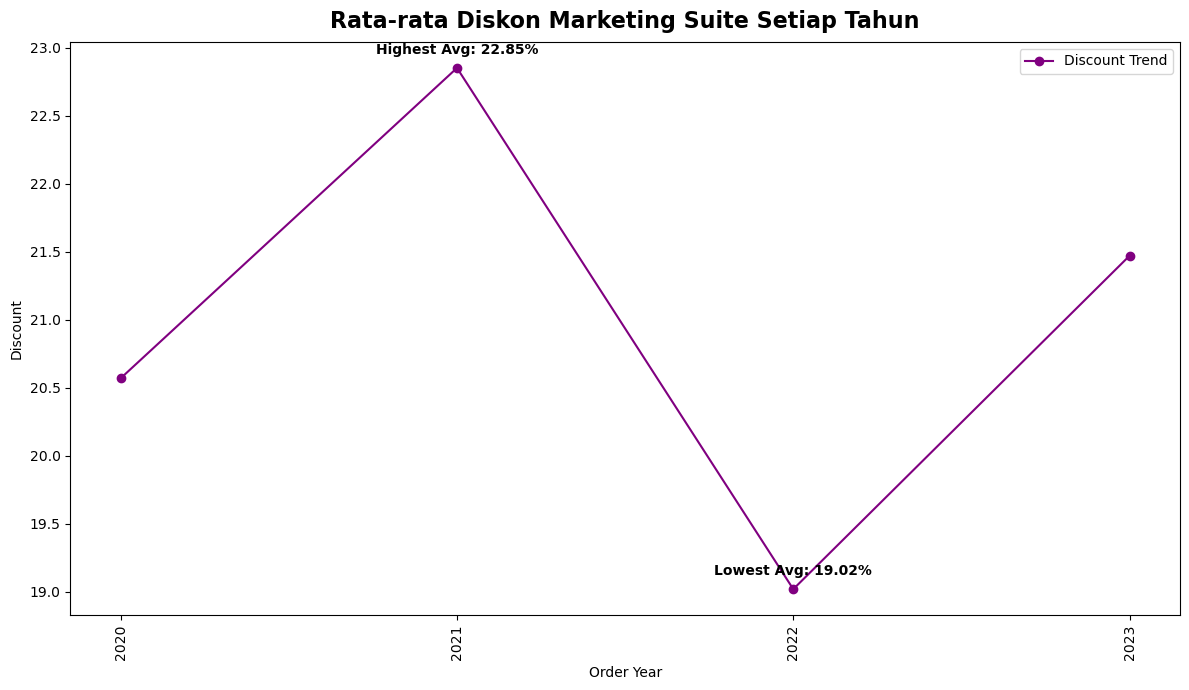

In [326]:
plt.figure(figsize=(12, 7))
discount_values = df_msuite_discount_year['Discount'].str.replace('%', '').astype(float)
plt.plot(df_msuite_discount_year['Order Year'].astype(str), discount_values, marker='o', linestyle='-', color='purple', label='Discount Trend')

max_index = discount_values.idxmax()
min_index = discount_values.idxmin()

plt.annotate(f"Highest Avg: {df_msuite_discount_year['Discount'][max_index]}", 
             (df_msuite_discount_year['Order Year'].astype(str)[max_index], discount_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
plt.annotate(f"Lowest Avg: {df_msuite_discount_year['Discount'][min_index]}", 
             (df_msuite_discount_year['Order Year'].astype(str)[min_index], discount_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Order Year')
plt.ylabel('Discount')
plt.title('Rata-rata Diskon Marketing Suite Setiap Tahun', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

Menurut hasil di atas kita dapat mengetahui bahwa produk Marketing Suite memiliki nilai Discount yang cukup besar. Nilai rata-rata diskon tertinggi terjadi pada tahun 2021 dengan rata-rata nilai diskon 22.85% sedangkan rata-rata nilai diskon paling rendah terjadi pada tahun 2022 dengan nilai diskon rata-rata 19.02%

### Tren Penjualan Marketing Suite Setiap Bulan

In [339]:
df_msuite_month = df_msuite.groupby('Order Month')[['Sales','Profit']].mean().reset_index()
df_msuite_month['Sales'] = df_msuite_month['Sales'].map('${:,.2f}'.format)
df_msuite_month['Profit'] = df_msuite_month['Profit'].map('${:,.2f}'.format)

df_msuite_month.head()

,Order Month,Sales,Profit
0,2020-01,$179.85,$-82.55
1,2020-02,$290.67,$3.42
2,2020-03,$568.82,$-47.07
3,2020-04,$308.50,$-18.15
4,2020-05,$320.32,$-94.81


In [340]:
df_msuite_profit_month = df_msuite.groupby('Order Month')[['Persentase Profit']].mean().reset_index()
df_msuite_profit_month['Persentase Profit'] = df_msuite_profit_month['Persentase Profit'].apply(lambda x: f"{x:.2f}%")
df_msuite_profit_month.head()

,Order Month,Persentase Profit
0,2020-01,-58.37%
1,2020-02,1.18%
2,2020-03,-22.00%
3,2020-04,-5.88%
4,2020-05,-26.30%


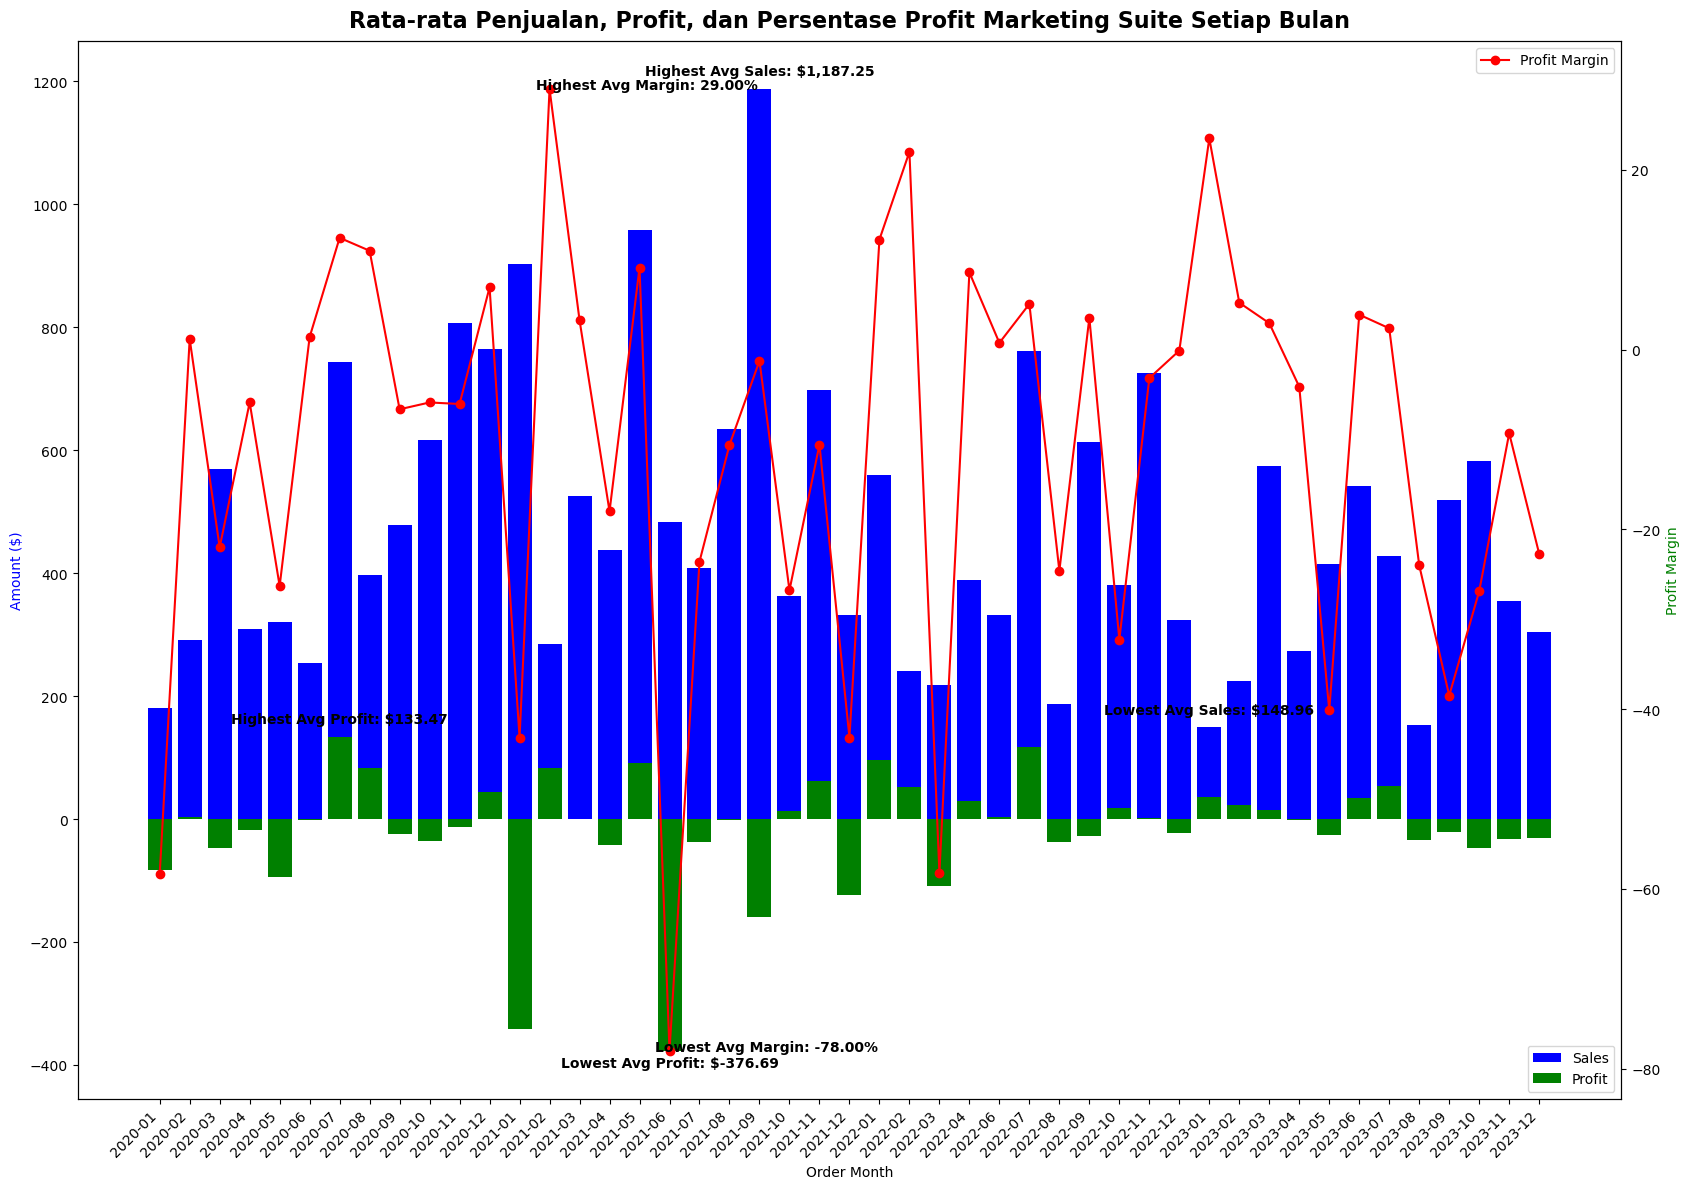

In [341]:
# Mengubah Sales dan Profit menjadi numerik
df_msuite_month['Sales'] = df_msuite_month['Sales'].str.replace(',', '').str.replace('$', '').astype(float)
df_msuite_month['Profit'] = df_msuite_month['Profit'].str.replace('$', '').astype(float)
profit_margin_msuite = df_msuite_profit_month['Persentase Profit'].str.rstrip('%').astype(float)

# Membuat figure dan axes
fig, ax1 = plt.subplots(figsize=(17, 12))

# Bar plot untuk Sales dan Profit
ax1.bar(df_msuite_month['Order Month'].astype(str), df_msuite_month['Sales'], label='Sales', color='blue')
ax1.bar(df_msuite_month['Order Month'].astype(str), df_msuite_month['Profit'], label='Profit', color='green')

# Line plot untuk Profit Margin
ax2 = ax1.twinx()
ax2.plot(df_msuite_profit_month['Order Month'].astype(str), profit_margin_msuite, marker='o', linestyle='-', color='red', label='Profit Margin')

# Anotasi untuk Sales
max_index_sales = df_msuite_month['Sales'].idxmax()
min_index_sales = df_msuite_month['Sales'].idxmin()
ax1.annotate(f"Highest Avg Sales: ${df_msuite_month['Sales'][max_index_sales]:,.2f}", 
             (df_msuite_month['Order Month'].astype(str)[max_index_sales], df_msuite_month['Sales'][max_index_sales]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
ax1.annotate(f"Lowest Avg Sales: ${df_msuite_month['Sales'][min_index_sales]:,.2f}", 
             (df_msuite_month['Order Month'].astype(str)[min_index_sales], df_msuite_month['Sales'][min_index_sales]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

# Anotasi untuk Profit
max_index_profit = df_msuite_month['Profit'].idxmax()
min_index_profit = df_msuite_month['Profit'].idxmin()
ax1.annotate(f"Highest Avg Profit: ${df_msuite_month['Profit'][max_index_profit]:,.2f}", 
             (df_msuite_month['Order Month'].astype(str)[max_index_profit], df_msuite_month['Profit'][max_index_profit]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
ax1.annotate(f"Lowest Avg Profit: ${df_msuite_month['Profit'][min_index_profit]:,.2f}", 
             (df_msuite_month['Order Month'].astype(str)[min_index_profit], df_msuite_month['Profit'][min_index_profit]),
             textcoords="offset points", xytext=(0,-12), ha='center', fontsize=10, fontweight='bold')

# Anotasi untuk Profit Margin
max_index_margin = profit_margin_msuite.idxmax()
min_index_margin = profit_margin_msuite.idxmin()
ax2.annotate(f"Highest Avg Margin: {df_msuite_profit_month['Persentase Profit'][max_index_margin]}", 
             (df_msuite_profit_month['Order Month'].astype(str)[max_index_margin], profit_margin_msuite[max_index_margin]),
             textcoords="offset points", xytext=(70,0), ha='center', fontsize=10, fontweight='bold')
ax2.annotate(f"Lowest Avg Margin: {df_msuite_profit_month['Persentase Profit'][min_index_margin]}", 
             (df_msuite_profit_month['Order Month'].astype(str)[min_index_margin], profit_margin_msuite[min_index_margin]),
             textcoords="offset points", xytext=(70,0), ha='center', fontsize=10, fontweight='bold')

# Pengaturan label dan judul
ax1.set_xlabel('Order Month')
ax1.set_ylabel('Amount ($)', color='blue')
ax2.set_ylabel('Profit Margin', color='green')
plt.title('Rata-rata Penjualan, Profit, dan Persentase Profit Marketing Suite Setiap Bulan', size=16, pad=10, fontweight='bold')

# Menampilkan legenda
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

# Memiringkan label pada sumbu x
ax1.set_xticklabels(df_msuite_month['Order Month'].astype(str), rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()
plt.show()

Hasil dari grafik di atas dapat kita ambil informasi sebagai berikut:

1.  Penjualan dari Marketing Suite berfluktuasi secara signifikan selama periode Januari 2020 hingga Desember 2023. Hal ini dapat disebabkan oleh berbagai faktor seperti perubahan penjualan, harga pokok penjualan, biaya operasional, atau biaya lainnya.

2. Penjualan produk Marketing Suite sering kali mengalami kerugian, terutama pada tahun 2021.

3. Kerugian paling tinggi terjadi pada bulan Juni 2021 dengan rata-rata kerugian $-376.69 setiap transaksi dan persentase rata-rata kerugian yang menyentuh angka -78%. Ini merupakan hal yang tidak boleh terjadi kembali pada periode waktu yang akan datang.

4. Bahkan pada bulan September 2021 dengan rata-rata penjualan tertinggi yang menyentuh angka $1,187.25, produk Marketing Suite masih mengalami kerugian.

In [337]:
df_msuite_discount = df_msuite.groupby("Order Month")[["Discount"]].mean().reset_index()
df_msuite_discount['Discount'] = (df_msuite_discount['Discount'] * 100).apply(lambda x: f"{x:.2f}%")
df_msuite_discount.head()

,Order Month,Discount
0,2020-01,33.75%
1,2020-02,15.00%
2,2020-03,26.67%
3,2020-04,15.00%
4,2020-05,32.50%


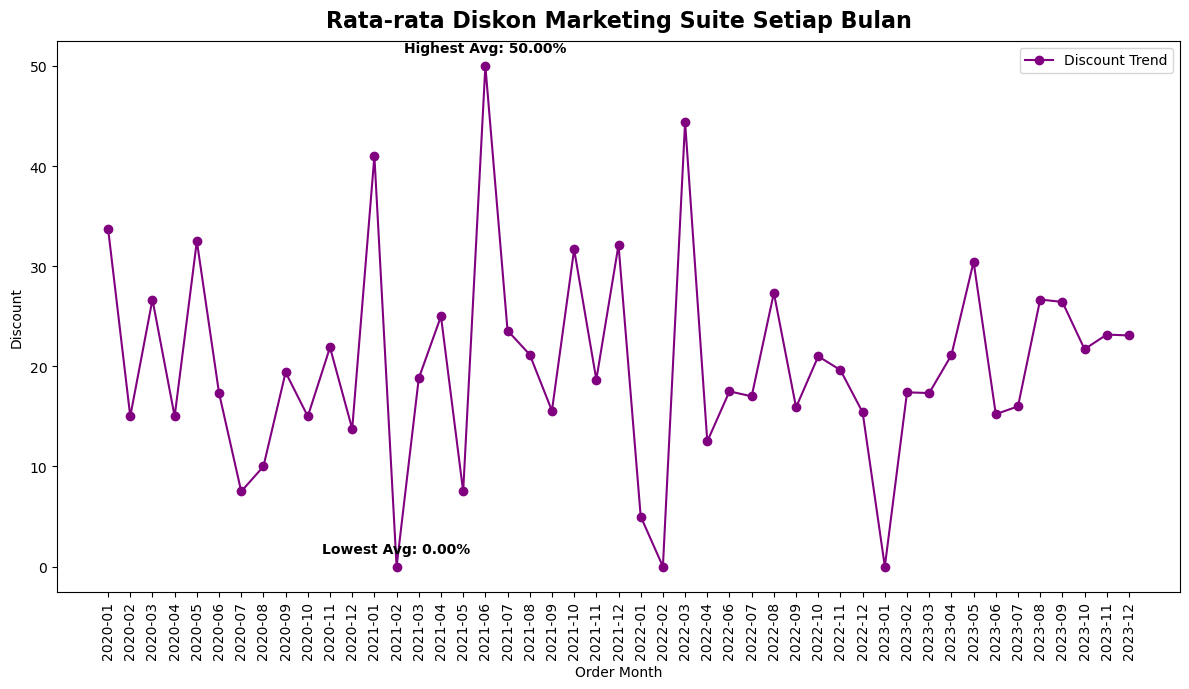

In [343]:
plt.figure(figsize=(12, 7))
discount_values = df_msuite_discount['Discount'].str.replace('%', '').astype(float)
plt.plot(df_msuite_discount['Order Month'].astype(str), discount_values, marker='o', linestyle='-', color='purple', label='Discount Trend')

max_index = discount_values.idxmax()
min_index = discount_values.idxmin()

plt.annotate(f"Highest Avg: {df_msuite_discount['Discount'][max_index]}", 
             (df_msuite_discount['Order Month'].astype(str)[max_index], discount_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
plt.annotate(f"Lowest Avg: {df_msuite_discount['Discount'][min_index]}", 
             (df_msuite_discount['Order Month'].astype(str)[min_index], discount_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Order Month')
plt.ylabel('Discount')
plt.title('Rata-rata Diskon Marketing Suite Setiap Bulan', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

Hasil dari grafik di atas menunjukkan bahwa produk Marketing Suite hanya 3 kali dijual tanpa diskon dalam periode ini, yaitu pada bulan Februari 2021, Februari 2022, dan Januari 2023. Selebihnya hampir setiap bulan diberlakukan diskon, dengan rata-rata diskon tertinggi terjadi pada bulan Juni 2021 dengan rata-rata diskon 50% setiap transaksi.

### Menganalisis Dampak Diskon terhadap Profit Marketing Suite

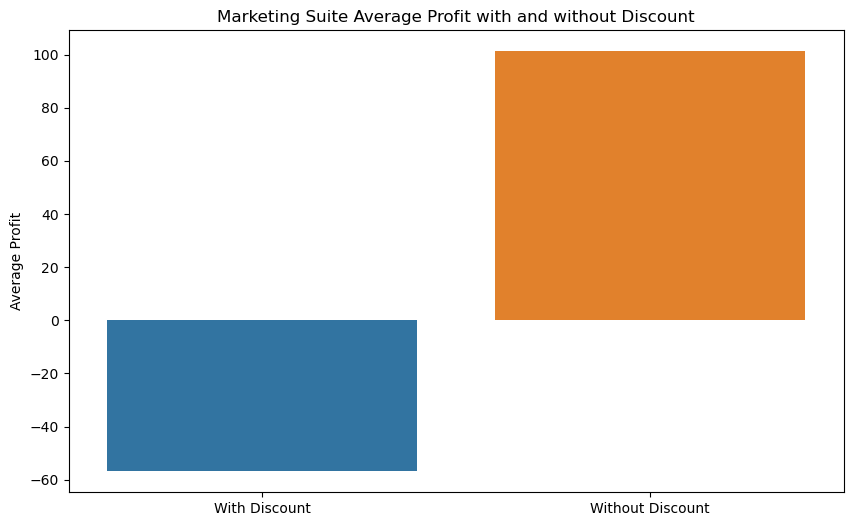

Test Statistic: 902.0, p-value: 3.958553197410029e-21
Tolak hipotesis nol: Terdapat perbedaan signifikan antara profit tanpa diskon dan profit dengan diskon.


In [348]:
# Menghitung rata-rata profit msuite dengan dan tanpa diskon
average_profit_msuite_with_discount = df_msuite[df_msuite['Discount'] > 0]['Profit'].mean()
average_profit_msuite_without_discount = df_msuite[df_msuite['Discount'] == 0]['Profit'].mean()

# Visualisasi perbandingan rata-rata profit
plt.figure(figsize=(10, 6))
sns.barplot(x=['With Discount', 'Without Discount'], y=[average_profit_msuite_with_discount, average_profit_msuite_without_discount])
plt.title('Marketing Suite Average Profit with and without Discount')
plt.ylabel('Average Profit')
plt.show()

# Uji statistik untuk memeriksa signifikansi perbedaan profit dengan dan tanpa diskon menggunakan metode Mann-Whitney
# H0: Tidak ada perbedaan signifikan antara profit dengan dan tanpa diskon
# H1: Ada perbedaan signifikan antara profit dengan dan tanpa diskon
statistic, p_value = mannwhitneyu(df_msuite[df_msuite['Discount'] > 0]['Profit'], df_msuite[df_msuite['Discount'] == 0]['Profit'])
print(f'Test Statistic: {statistic}, p-value: {p_value}')

# Menentukan tingkat signifikansi (cth: 0.05)
alpha = 0.05
if p_value < alpha:
    print("Tolak hipotesis nol: Terdapat perbedaan signifikan antara profit tanpa diskon dan profit dengan diskon.")
else:
    print("Terima hipotesis nol: Tidak terdapat perbedaan signifikan antara profit tanpa diskon dan profit dengan diskon.")

Hasil pengecekan dampak diskon terhadap profit dari produk Marketing Suite adalah terdapat perbedaan signifikan antara profit tanpa diskon dan profit dengan diskon. Ini menunjukkan bahwa diskon sangat berpengaruh pada profit, dan dapat dikatakan bahwa salah satu penyebab kerugian dari produk Marketing Suite adalah strategi diskon yang kurang tepat, sehingga ketika produk Marketing Suite diberlakukan diskon perusahaan mengalami kerugian.

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita dapat membuat kesimpulan sebagai berikut:
* Dari 9,994 data transaksi, ada 1,871 transaksi yang mengalami kerugian.
* 11 dari 14 jenis produk pernah mengalami transaksi yang menghasilkan kerugian, hanya produk Alchemy, ChatBot Plugin, dan SaaS Connector Pack - Gold yang tidak pernah mengalami kerugian.
* Produk Marketing Suite menjadi satu-satunya produk yang sama sekali tidak menghasilkan profit di periode Januari 2020 hingga Desember 2023, dengan jumlah kerugian sebesar $3,472.56.
* Berdasarkan persentase keuntungan, produk Alchemy menjadi produk yang berkontribusi paling tinggi dalam menghasilkan keuntungan dengan persentase sebesar 19.42% ($55,617.82)
* Tren penjualan dan profitabilitas dari tahun ke tahun dapat dikatakan stabil, tidak ada perubahan yang signifikan dari nilai penjualan dan profitabilitas.
* Diskon yang diberikan oleh perusahaan memiliki dampak yang signifikan terhadap profit, terutama pada produk Marketing Suite yang hampir selalu menyebabkan kerugian ketika produk diterapkan diskon.



**Rekomendasi**

1. Perusahaan sebaiknya melakukan evaluasi terhadap produk Marketing Suite. Meskipun produk ini memiliki penjualan, namun selama periode tertentu, tidak menghasilkan profit dan cenderung merugikan. Evaluasi terkait strategi pemasaran, harga, atau fitur produk dapat membantu meningkatkan profitabilitas atau mempertimbangkan opsi untuk produk pengganti.

2. Dengan mengetahui bahwa diskon memiliki dampak signifikan terhadap profit, perusahaan harus mengoptimalkan strategi diskonnya. Mungkin perlu mempertimbangkan diskon yang lebih cerdas, seperti memberikan diskon hanya pada produk tertentu atau pada situasi penjualan tertentu.

3. Produk Alchemy tercatat sebagai kontributor utama keuntungan. Sebaiknya, perusahaan menganalisis lebih lanjut faktor-faktor yang membuat produk ini berhasil dan mempertimbangkan untuk mengadopsi strategi serupa pada produk lain atau meningkatkan fitur dan pemasaran produk ini.

4. Meskipun tren penjualan dan profitabilitas stabil dalam periode tertentu, perusahaan sebaiknya tetap melakukan pemantauan dan evaluasi secara berkala. Terus memantau kinerja produk, tren pasar, dan strategi pemasaran dapat membantu perusahaan menjaga keberlanjutan dan melakukan perbaikan kontinu.

Rekomendasi ini dapat membantu perusahaan dalam mengidentifikasi peluang perbaikan dan pertumbuhan, serta mengoptimalkan strategi bisnisnya.